<a href="https://colab.research.google.com/github/kevindhuertas/transformer_model_with_time_signals/blob/main/Colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reemplaza el enlace de Dropbox con tu enlace compartido
!wget -O data.csv 'https://www.dropbox.com/scl/fi/4l7ezza6f1cwbizgxvicj/data.csv?rlkey=xcr58lmxqr1d173f0mndr433r&st=0g226u74&dl=0'


--2024-10-15 00:34:58--  https://www.dropbox.com/scl/fi/4l7ezza6f1cwbizgxvicj/data.csv?rlkey=xcr58lmxqr1d173f0mndr433r&st=0g226u74&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1d38ca5b14b3e5b31772de9030.dl.dropboxusercontent.com/cd/0/inline/Ccedm3W0B346wq1ZY6W_LDQm6JBt9RfMDDzFLHgby6o1hs96SkuM_AUiLKEdJeSnvCJoZKLRbcXcAA6f5PcxYOATReP3m7Spm3GDY3E4yXE4le8wHynO4KxsnZahd6oPPc8fUMCu8BtwedT58HX_cqOx/file# [following]
--2024-10-15 00:34:59--  https://uc1d38ca5b14b3e5b31772de9030.dl.dropboxusercontent.com/cd/0/inline/Ccedm3W0B346wq1ZY6W_LDQm6JBt9RfMDDzFLHgby6o1hs96SkuM_AUiLKEdJeSnvCJoZKLRbcXcAA6f5PcxYOATReP3m7Spm3GDY3E4yXE4le8wHynO4KxsnZahd6oPPc8fUMCu8BtwedT58HX_cqOx/file
Resolving uc1d38ca5b14b3e5b31772de9030.dl.dropboxusercontent.com (uc1d38ca5b14b3e5b31772de9030.dl.dropboxusercontent.com)... 162.125

##EXPLORANDO DATASET


In [ ]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, LSTM, TimeDistributed
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MultiHeadAttention, LayerNormalization, Add
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv1D, Dense, Dropout, Flatten, LSTM, BatchNormalization, ReLU, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization


In [ ]:
df = pd.read_csv('data.csv')

print("Dataset",df.head())

  Network Station  SampleRate Component  Year  Month Type  Duration  \
0      EC     VC1         100       SHZ  2012      1   VT        23   
1      EC     VC1         100       SHZ  2012      1   LP        47   
2      EC     VC1         100       SHZ  2012      1   LP        56   
3      EC     VC1         100       SHZ  2012      1   VT        49   
4      EC     VC1         100       SHZ  2012      1   VT        31   

   StartPoint  EndPoint  ...  Data_40492  Data_40493  Data_40494  Data_40495  \
0        1001      3301  ...         NaN         NaN         NaN         NaN   
1        1001      5701  ...         NaN         NaN         NaN         NaN   
2        1001      6601  ...         NaN         NaN         NaN         NaN   
3        1001      5901  ...         NaN         NaN         NaN         NaN   
4        1001      4101  ...         NaN         NaN         NaN         NaN   

   Data_40496  Data_40497  Data_40498  Data_40499  Data_40500  Data_40501  
0         NaN   

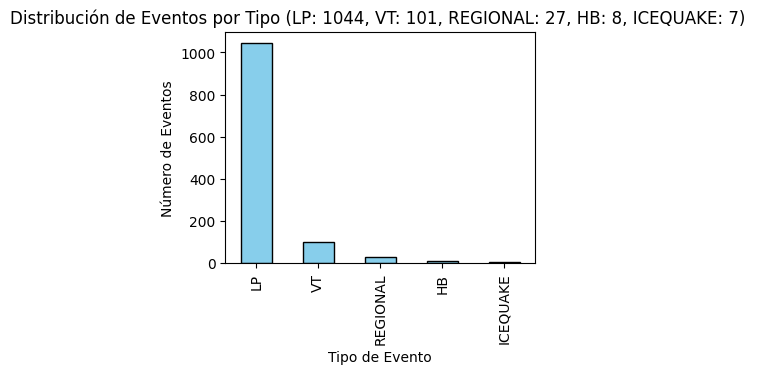

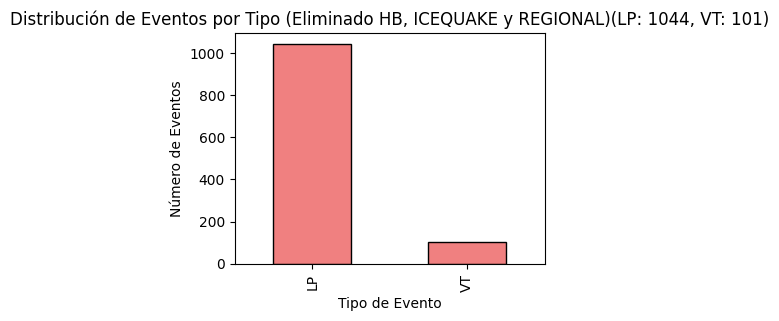

In [ ]:
event_counts = df['Type'].value_counts()
event_counts_str = ', '.join([f'{idx}: {val}' for idx, val in event_counts.items()])

# Mostrar gráfica original con todos los tipos de eventos
plt.figure(figsize=(4, 3))
event_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Eventos por Tipo ('+event_counts_str+') ')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.show()

# Eliminar los tipos 'HB', 'ICEQUAKE', y 'REGIONAL'
df_filtered = df[~df['Type'].isin(['HB', 'ICEQUAKE', 'REGIONAL'])]
event_counts_filtered = df_filtered['Type'].value_counts()

event_counts_f_str = ', '.join([f'{idx}: {val}' for idx, val in event_counts_filtered.items()])
plt.figure(figsize=(4, 3))
event_counts_filtered.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Distribución de Eventos por Tipo (Eliminado HB, ICEQUAKE y REGIONAL)('+event_counts_f_str+')')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.show()


Número de eventos antes de eliminar outliers: 1187
Número de eventos después de eliminar outliers: 1129
Se eliminaron 58 eventos con duraciones extremas.


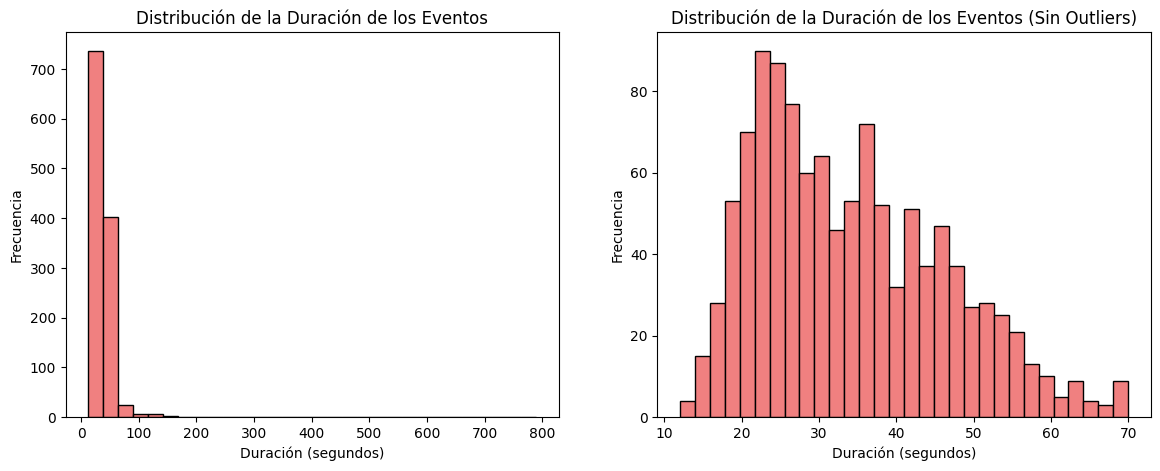

In [ ]:
# Crear un histograma para la duración de los eventos antes de eliminar outliers
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Duration'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de la Duración de los Eventos')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')


mean_duration = df['Duration'].mean()
std_duration = df['Duration'].std()

# Umbral para considerar una duración como outlier
threshold = 1  # 3 desviaciones estándar
lower_limit = mean_duration - threshold * std_duration
upper_limit = mean_duration + threshold * std_duration

# Filtrar outliers y guardarlos en df_outlets
df_outliers = df_filtered[(df_filtered['Duration'] < lower_limit) | (df_filtered['Duration'] > upper_limit)]
df_filtered = df_filtered[(df_filtered['Duration'] >= lower_limit) & (df_filtered['Duration'] <= upper_limit)]

num_before = len(df)
num_after = len(df_filtered)
print(f"Número de eventos antes de eliminar outliers: {num_before}")
print(f"Número de eventos después de eliminar outliers: {num_after}")
print(f"Se eliminaron {num_before - num_after} eventos con duraciones extremas.")

plt.subplot(1, 2, 2)
plt.hist(df_filtered['Duration'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribución de la Duración de los Eventos (Sin Outliers)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')

plt.show()


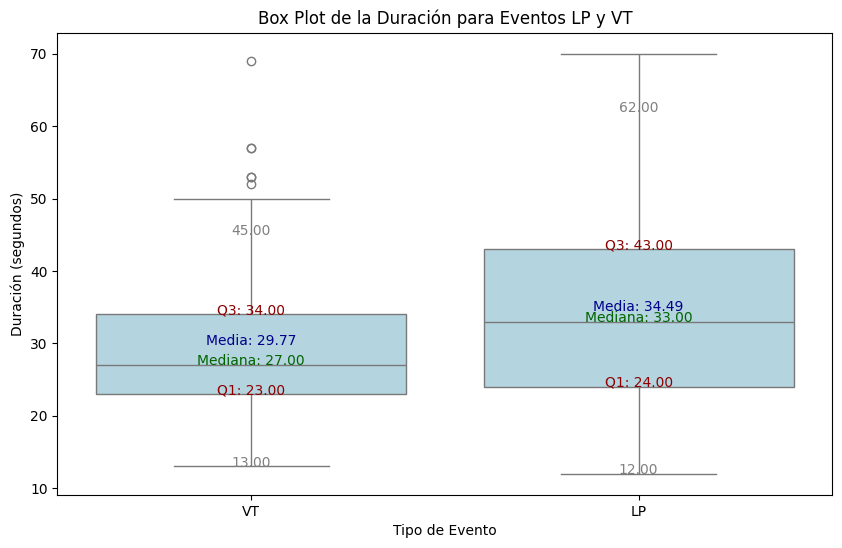

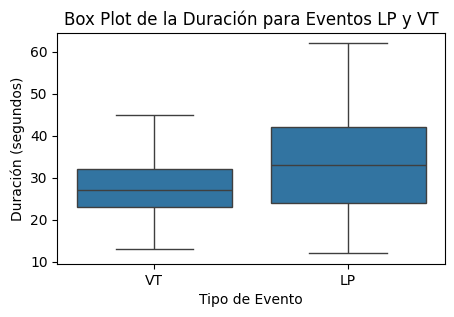

Estadísticas para LP:
  - Media: 33.7300796812749
  - Mediana: 33.0
  - Primer cuartil (Q1): 24.0
  - Tercer cuartil (Q3): 42.0
  - Rango Intercuartílico (IQR): 18.0
  - Bigote inferior: 6.0
  - Bigote superior: 60.0


Estadísticas para VT:
  - Media: 27.602150537634408
  - Mediana: 27.0
  - Primer cuartil (Q1): 23.0
  - Tercer cuartil (Q3): 32.0
  - Rango Intercuartílico (IQR): 9.0
  - Bigote inferior: 14.0
  - Bigote superior: 41.0




In [ ]:
# Filtrar el dataset filtrado previamente para incluir solo eventos LP y VT
filtered_df = df_filtered[df_filtered['Type'].isin(['LP', 'VT'])]

# Crear el boxplot con colores claros y sin negrita
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Type', y='Duration', data=filtered_df, color='lightblue')

# Calcular las estadísticas descriptivas
grouped = filtered_df.groupby('Type')['Duration']

# Añadir las estadísticas al gráfico, incluyendo los bigotes (sin outliers)
for i, event_type in enumerate(ax.get_xticklabels()):  # Aseguramos el orden correcto de las etiquetas
    event_type = event_type.get_text()  # Obtener el texto de las etiquetas
    durations = grouped.get_group(event_type)  # Obtener los datos correspondientes

    # Calcular las estadísticas
    mean_val = durations.mean()
    median_val = durations.median()
    q1 = durations.quantile(0.25)  # Primer cuartil
    q3 = durations.quantile(0.75)  # Tercer cuartil
    iqr = q3 - q1  # Rango intercuartílico
    lower_whisker = max(durations.min(), q1 - threshold * iqr)  # Bigote inferior
    upper_whisker = min(durations.max(), q3 + threshold * iqr)  # Bigote superior

    # Añadir texto para las estadísticas en la gráfica con colores claros y sin negrita
    plt.text(i, median_val, f'Mediana: {median_val:.2f}', horizontalalignment='center', size='medium', color='darkgreen')
    plt.text(i, mean_val, f'Media: {mean_val:.2f}', horizontalalignment='center', size='medium', color='darkblue')
    plt.text(i, q1, f'Q1: {q1:.2f}', horizontalalignment='center', size='medium', color='darkred')
    plt.text(i, q3, f'Q3: {q3:.2f}', horizontalalignment='center', size='medium', color='darkred')

    # Añadir texto para los bigotes
    plt.text(i, lower_whisker, f'{lower_whisker:.2f}', horizontalalignment='center', size='medium', color='gray')
    plt.text(i, upper_whisker, f'{upper_whisker:.2f}', horizontalalignment='center', size='medium', color='gray')

# Configuración del gráfico
plt.title('Box Plot de la Duración para Eventos LP y VT')
plt.xlabel('Tipo de Evento')
plt.ylabel('Duración (segundos)')
plt.show()

#eliminamos los outliers restantes:
#  rangos de duración aceptables
# LP: Duración entre 5.0 y 62.0 segundos
# VT: Duración entre 12.0 y 45 segundos
mask_LP = df_filtered['Type'] == 'LP'
mask_VT = df_filtered['Type'] == 'VT'
outliers_LP = df_filtered[mask_LP & ((df_filtered['Duration'] < 5.0) | (df_filtered['Duration'] > 62.0))]
outliers_VT = df_filtered[mask_VT & ((df_filtered['Duration'] < 12.0) | (df_filtered['Duration'] > 45))]

outliers = pd.concat([outliers_LP, outliers_VT])
df_outliers = pd.concat([df_outliers, outliers], ignore_index=True)

# Eliminar los outliers del dataframe 'df_filtered'
df_filtered = df_filtered.drop(outliers.index)
# df_filtered.reset_index(drop=True, inplace=True)

filtered_df = df_filtered[df_filtered['Type'].isin(['LP', 'VT'])]

# Crear el boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Duration', data=filtered_df)
plt.title('Box Plot de la Duración para Eventos LP y VT')
plt.xlabel('Tipo de Evento')
plt.ylabel('Duración (segundos)')
plt.show()
grouped = filtered_df.groupby('Type')['Duration']

# Media, Q1, Q3 y IQR para LP y VT
for event_type in grouped.groups.keys():
    print(f"Estadísticas para {event_type}:")
    durations = grouped.get_group(event_type)
    mean_val = durations.mean()
    median_val = durations.median()
    q1 = durations.quantile(0.25)
    q3 = durations.quantile(0.75)
    iqr = q3 - q1  # Rango intercuartílico
    print(f"  - Media: {mean_val}")
    print(f"  - Mediana: {median_val}")
    print(f"  - Primer cuartil (Q1): {q1}")
    print(f"  - Tercer cuartil (Q3): {q3}")
    print(f"  - Rango Intercuartílico (IQR): {iqr}")
    print(f"  - Bigote inferior: {q1 - threshold * iqr}")
    print(f"  - Bigote superior: {q3 + threshold * iqr}")
    print("\n")


IGUALACION DE LAS SEÑALES Y NORMALIZACION


La longitud fija de las señales será de 5000 muestras.
Valor mínimo en las señales normalizadas: 0.0
Valor máximo en las señales normalizadas: 1.0


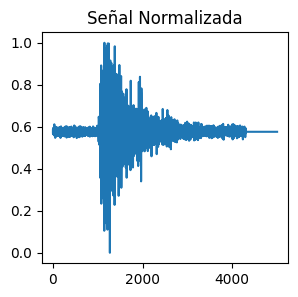

In [ ]:
signal_columns = [col for col in df_filtered.columns if col.startswith('Data_')]
sample_rate = 100  # Hz
fixed_duration_seconds = 50  # Puedes ajustar este valor según tus necesidades
fixed_length = fixed_duration_seconds * sample_rate  # Número de muestras

print(f"La longitud fija de las señales será de {fixed_length} muestras.")


def adjust_signal_length(signal, target_length):
    current_length = len(signal)
    if current_length > target_length:
        # Truncar la señal
        adjusted_signal = signal[:target_length]
    elif current_length < target_length:
        # Rellenar la señal con ceros al final
        padding_length = target_length - current_length
        padding = np.zeros(padding_length)
        adjusted_signal = np.concatenate([signal, padding])
    else:
        # La señal ya tiene la longitud deseada
        adjusted_signal = signal
    return adjusted_signal

# Crear una lista para almacenar las señales ajustadas
adjusted_signals = []

for index, row in df_filtered.iterrows():
    # Extraer la señal y eliminar valores NaN
    signal = row[signal_columns].dropna().values.astype(np.float32)
    # Ajustar la señal a la longitud fija
    adjusted_signal = adjust_signal_length(signal, fixed_length)
    # Agregar la señal ajustada a la lista
    adjusted_signals.append(adjusted_signal)

df_filtered['NormalizedSignal'] = adjusted_signals

def min_max_normalize_signal(signal):
    min_val = np.min(signal)
    max_val = np.max(signal)
    if max_val - min_val == 0:
        return signal  # Evitar división por cero
    else:
        return (signal - min_val) / (max_val - min_val)

# Aplicar la normalización Min-Max a las señales ajustadas
normalized_signals = []
for signal in df_filtered['NormalizedSignal']:
    normalized_signal = min_max_normalize_signal(signal)
    normalized_signals.append(normalized_signal)

# Añadir las señales normalizadas al DataFrame
df_filtered['NormalizedSignal'] = normalized_signals

# Verificar que todas las señales están dentro del rango [0, 1]
min_values = [signal.min() for signal in df_filtered['NormalizedSignal']]
max_values = [signal.max() for signal in df_filtered['NormalizedSignal']]
print(f"Valor mínimo en las señales normalizadas: {min(min_values)}")
print(f"Valor máximo en las señales normalizadas: {max(max_values)}")

# original_signal = df_filtered['AdjustedSignal'].iloc[0]
normalized_signal = df_filtered['NormalizedSignal'].iloc[0]
plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 2)
plt.plot(normalized_signal)
plt.title('Señal Normalizada')
plt.show()



## ENTRENAMIENTO EN CRUDO


###AST con datos crudos

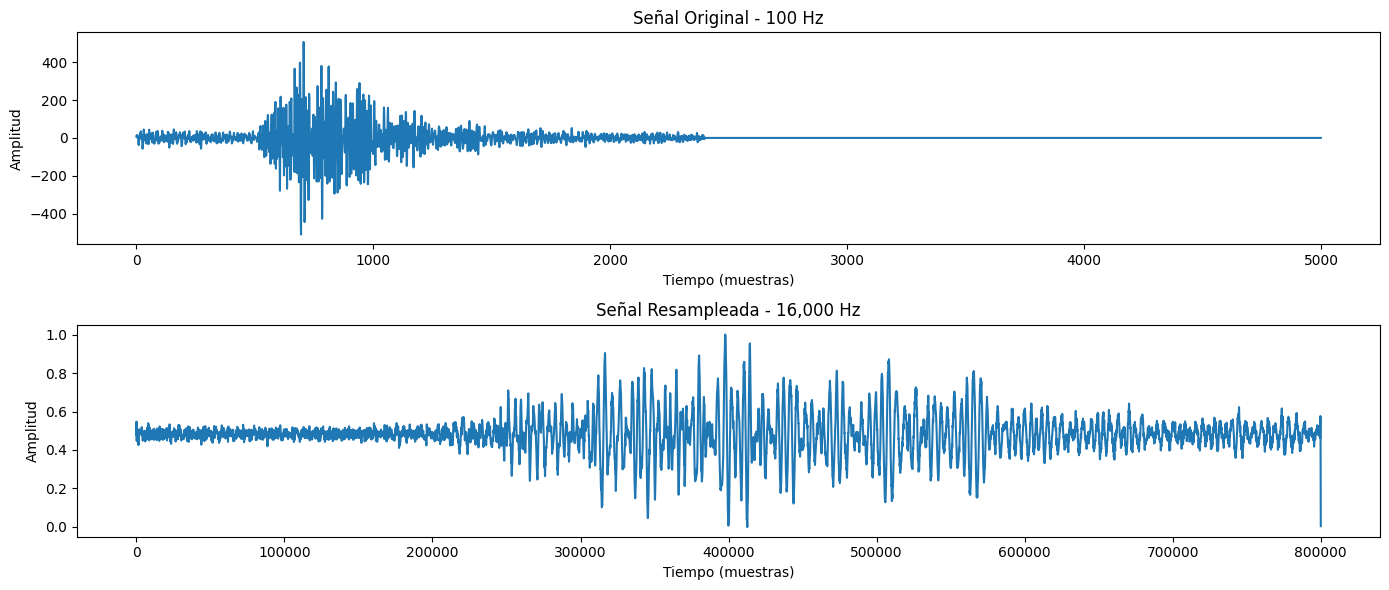

Some weights of ASTForAudioClassification were not initialized from the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 and are newly initialized because the shapes did not match:
- classifier.dense.bias: found shape torch.Size([527]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.dense.weight: found shape torch.Size([527, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/30
Train Loss: 0.3230 | Train Accuracy: 0.9202
Val Loss: 0.3431 | Val Accuracy: 0.8955
Epoch 2/30
Train Loss: 0.2800 | Train Accuracy: 0.9202
Val Loss: 0.3339 | Val Accuracy: 0.8955
Epoch 3/30
Train Loss: 0.2876 | Train Accuracy: 0.9202
Val Loss: 0.3159 | Val Accuracy: 0.8955


KeyboardInterrupt: 

In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T
import numpy as np
from transformers import ASTForAudioClassification, ASTFeatureExtractor
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

# 1. Preparación de Datos

class SeismicDataset(Dataset):
    def __init__(self, signals, labels, extractor):
        self.signals = signals
        self.labels = labels
        self.extractor = extractor
        self.resample_transform = T.Resample(orig_freq=100, new_freq=16000)  # Resample de 100 Hz a 16,000 Hz

    def __len__(self):
        return len(self.signals)

    def __getitem__(self, idx):
        signal = self.signals[idx]
        label = self.labels[idx]

        # Resamplear la señal de 100 Hz a 16,000 Hz
        waveform = torch.tensor(signal, dtype=torch.float32).unsqueeze(0)
        waveform_resampled = self.resample_transform(waveform)

        # Usar el extractor de características AST para procesar el audio resampleado
        inputs = self.extractor(waveform_resampled.squeeze().numpy(), sampling_rate=16000, return_tensors="pt", padding=True)

        return inputs.input_values.squeeze(0), torch.tensor(label)

# 2. Configuración del Dataset y del Modelo Preentrenado

# Convertir las señales normalizadas a array numpy
X = np.stack(df_filtered['NormalizedSignal'].values)
y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el extractor de características de AST
extractor = ASTFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# Crear los datasets de entrenamiento y validación
train_dataset = SeismicDataset(X_train, y_train, extractor)
val_dataset = SeismicDataset(X_val, y_val, extractor)

#ver imagen de la señal --------------------
# Visualizar la primera señal resampleada
signal1 = train_dataset.signals[0]
waveform1 = torch.tensor(signal1, dtype=torch.float32).unsqueeze(0)
waveform_resampled1 = train_dataset.resample_transform(waveform1)
plt.figure(figsize=(14, 6))# Visualización
plt.subplot(2, 1, 1)# Señal original (100 Hz)
plt.plot(signal)
plt.title('Señal Original - 100 Hz')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.subplot(2, 1, 2) # Señal resampleada (16,000 Hz)
plt.plot(waveform_resampled1.squeeze().numpy())
plt.title('Señal Resampleada - 16,000 Hz')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()
#----------------------------------------

# Crear los DataLoaders para cargar los datos por lotes
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Cargar el modelo preentrenado AST para clasificación de audio
# model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593", num_labels=527)
model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593", num_labels=2,ignore_mismatched_sizes=True)

# Ajustar la capa final de clasificación para 2 clases
model.classifier.dense = torch.nn.Linear(in_features=768, out_features=2)
model.classifier.dropout = torch.nn.Dropout(0.5)  # Añadir dropout para evitar overfitting
model.classifier.out_proj = torch.nn.Linear(in_features=2, out_features=2)

# 3. Configuración para Entrenamiento

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
criterion = torch.nn.CrossEntropyLoss()

# 4. Funciones de Entrenamiento y Evaluación

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    correct_predictions = 0

    for inputs, labels in data_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs).logits
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct_predictions += (outputs.argmax(dim=1) == labels).sum().item()

    accuracy = correct_predictions / len(data_loader.dataset)
    return total_loss / len(data_loader), accuracy

def evaluate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs).logits
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            correct_predictions += (outputs.argmax(dim=1) == labels).sum().item()

    accuracy = correct_predictions / len(data_loader.dataset)
    return total_loss / len(data_loader), accuracy

# 5. Entrenamiento del Modelo

num_epochs = 30

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate_epoch(model, val_loader, criterion, device)

    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

# 6. Guardar el Modelo

model.save_pretrained("./seismic_ast_model")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predicciones en el conjunto de validación
def get_predictions(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs).logits
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

# Obtener las predicciones y etiquetas reales
y_true, y_pred = get_predictions(model, val_loader, device)

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['VT', 'LP'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


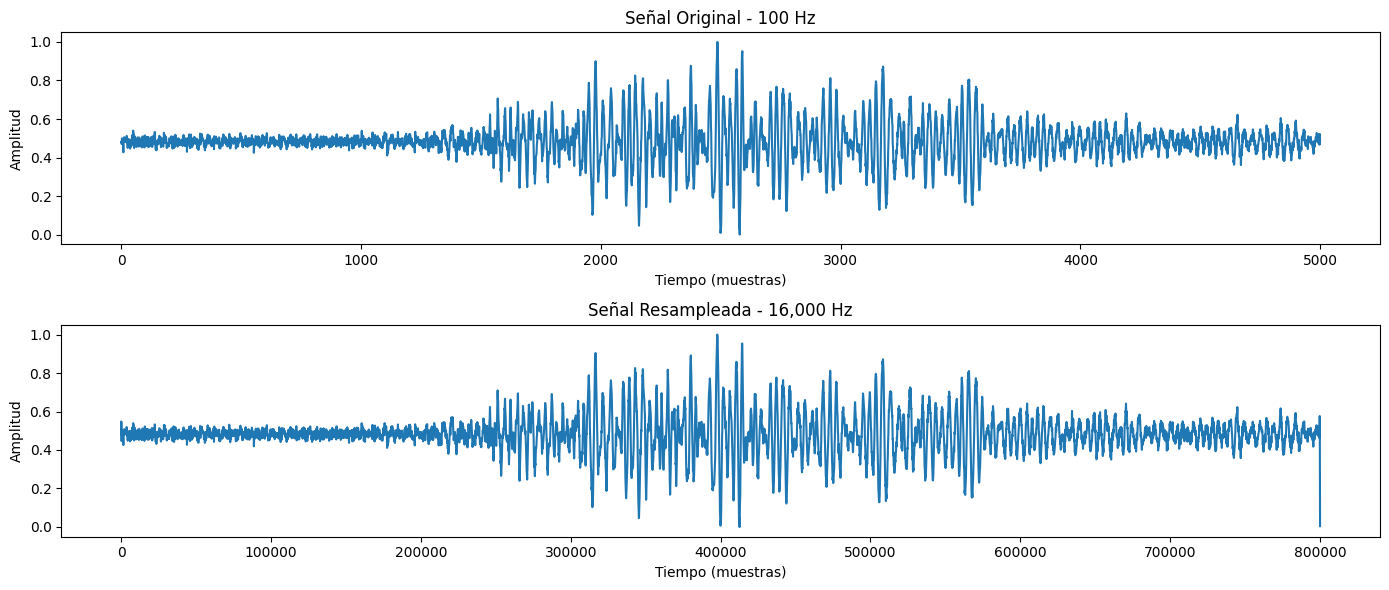

Some weights of ASTForAudioClassification were not initialized from the model checkpoint at MIT/ast-finetuned-audioset-10-10-0.4593 and are newly initialized because the shapes did not match:
- classifier.dense.bias: found shape torch.Size([527]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.dense.weight: found shape torch.Size([527, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/12
Train Loss: 0.7077 | Train Accuracy: 0.7514
Val Loss: 0.7646 | Val Accuracy: 0.3909
Epoch 2/12
Train Loss: 0.6661 | Train Accuracy: 0.6648
Val Loss: 0.6038 | Val Accuracy: 0.5227
Epoch 3/12
Train Loss: 0.5014 | Train Accuracy: 0.7503
Val Loss: 0.5086 | Val Accuracy: 0.8273
Epoch 4/12
Train Loss: 0.5184 | Train Accuracy: 0.7925
Val Loss: 0.4957 | Val Accuracy: 0.8273
Epoch 5/12
Train Loss: 0.4585 | Train Accuracy: 0.7891
Val Loss: 0.4818 | Val Accuracy: 0.8682
Epoch 6/12
Train Loss: 0.3590 | Train Accuracy: 0.7799
Val Loss: 0.5789 | Val Accuracy: 0.7955
Epoch 7/12
Train Loss: 0.3343 | Train Accuracy: 0.8518
Val Loss: 0.6402 | Val Accuracy: 0.6864
Epoch 8/12
Train Loss: 0.3852 | Train Accuracy: 0.8369
Val Loss: 0.5561 | Val Accuracy: 0.6318
Epoch 9/12
Train Loss: 0.2877 | Train Accuracy: 0.8552
Val Loss: 0.7549 | Val Accuracy: 0.7864
Epoch 10/12
Train Loss: 0.2147 | Train Accuracy: 0.8940
Val Loss: 1.0317 | Val Accuracy: 0.7818
Epoch 11/12
Train Loss: 0.3399 | Train Accuracy: 

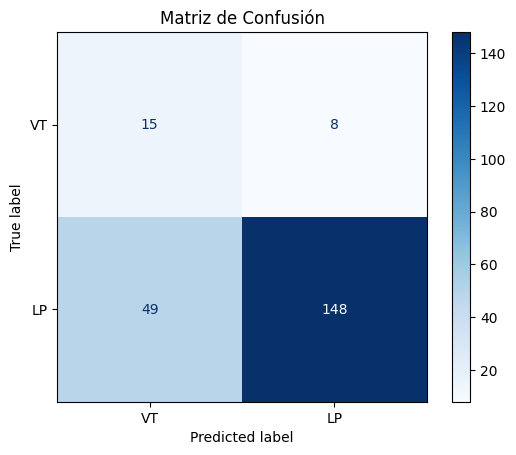

In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T
import numpy as np
from transformers import ASTForAudioClassification, ASTFeatureExtractor
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

# 1. Preparación de Datos

class SeismicDataset(Dataset):
    def __init__(self, signals, labels, extractor):
        self.signals = signals
        self.labels = labels
        self.extractor = extractor
        self.resample_transform = T.Resample(orig_freq=100, new_freq=16000)  # Resample de 100 Hz a 16,000 Hz

    def __len__(self):
        return len(self.signals)

    def __getitem__(self, idx):
        signal = self.signals[idx]
        label = self.labels[idx]

        # Resamplear la señal de 100 Hz a 16,000 Hz
        waveform = torch.tensor(signal, dtype=torch.float32).unsqueeze(0)  # Agregar dimensión del canal
        waveform_resampled = self.resample_transform(waveform)

        # Convertir a mono si no lo es (aunque ya lo debería ser, este paso es de seguridad)
        waveform_resampled = waveform_resampled.mean(dim=0, keepdim=True)

        # Usar el extractor de características AST para procesar el audio resampleado
        inputs = self.extractor(waveform_resampled.squeeze().numpy(), sampling_rate=16000, return_tensors="pt", padding=True)

        return inputs.input_values.squeeze(0), torch.tensor(label)

# 2. Configuración del Dataset y del Modelo Preentrenado

# Convertir las señales normalizadas a array numpy
X = np.stack(df_filtered['NormalizedSignal'].values)
y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el extractor de características de AST
extractor = ASTFeatureExtractor.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593")

# Crear los datasets de entrenamiento y validación
train_dataset = SeismicDataset(X_train, y_train, extractor)
val_dataset = SeismicDataset(X_val, y_val, extractor)

# Crear los DataLoaders para cargar los datos por lotes
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Visualización de la primera señal resampleada
signal1 = train_dataset.signals[0]
waveform1 = torch.tensor(signal1, dtype=torch.float32).unsqueeze(0)
waveform_resampled1 = train_dataset.resample_transform(waveform1)
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(signal1)
plt.title('Señal Original - 100 Hz')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.subplot(2, 1, 2)
plt.plot(waveform_resampled1.squeeze().numpy())
plt.title('Señal Resampleada - 16,000 Hz')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# 3. Cargar el modelo preentrenado AST para clasificación de audio
model = ASTForAudioClassification.from_pretrained("MIT/ast-finetuned-audioset-10-10-0.4593", num_labels=2, ignore_mismatched_sizes=True)
model.classifier = nn.Linear(768, 2)
# Desbloquear todas las capas del modelo para ajustar todo el modelo
for param in model.parameters():
    param.requires_grad = True

# Ajustar la capa final de clasificación para 2 clases
model.classifier.dense = torch.nn.Linear(in_features=768, out_features=2)
model.classifier.dropout = torch.nn.Dropout(0.5)  # Añadir dropout para evitar overfitting
model.classifier.out_proj = torch.nn.Linear(in_features=2, out_features=2)

# 4. Configuración para Entrenamiento

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Calcular los pesos de las clases para manejar el desbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

# Usar los pesos de las clases en la función de pérdida
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)  # Fine-tuning con tasa de aprendizaje baja
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# 5. Funciones de Entrenamiento y Evaluación

def train_epoch(model, data_loader, criterion, optimizer, scheduler, device):
    model.train()
    total_loss = 0
    correct_predictions = 0

    for inputs, labels in data_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs).logits
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct_predictions += (outputs.argmax(dim=1) == labels).sum().item()

    scheduler.step(total_loss)  # Ajustar la tasa de aprendizaje
    accuracy = correct_predictions / len(data_loader.dataset)
    return total_loss / len(data_loader), accuracy

def evaluate_epoch(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs).logits
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            correct_predictions += (outputs.argmax(dim=1) == labels).sum().item()

    accuracy = correct_predictions / len(data_loader.dataset)
    return total_loss / len(data_loader), accuracy

# 6. Entrenamiento del Modelo
def get_predictions(model, data_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs).logits
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)

# Configuración de las épocas para probar
epoch_list = [12, 20, 30, 50]
results = {}

for num_epochs in epoch_list:
    print(f"\nEntrenando con {num_epochs} épocas:\n")
    for epoch in range(num_epochs):
        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scheduler, device)
        val_loss, val_acc = evaluate_epoch(model, val_loader, criterion, device)

        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

    # Obtener las predicciones y etiquetas reales
    y_true, y_pred = get_predictions(model, val_loader, device)

    # Generar la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Guardar métricas y matriz de confusión en el diccionario de resultados
    results[num_epochs] = {
        'train_loss': train_loss,
        'train_acc': train_acc,
        'val_loss': val_loss,
        'val_acc': val_acc,
        'confusion_matrix': cm
    }

    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['VT', 'LP'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión para {num_epochs} Épocas')
    plt.show()

# Mostrar todas las métricas al final
print("\nResultados finales:")
for num_epochs, metrics in results.items():
    print(f"\nÉpocas: {num_epochs}")
    print(f"Train Loss: {metrics['train_loss']:.4f} | Train Accuracy: {metrics['train_acc']:.4f}")
    print(f"Val Loss: {metrics['val_loss']:.4f} | Val Accuracy: {metrics['val_acc']:.4f}")
    print("Matriz de Confusión:")
    print(metrics['confusion_matrix'])

# num_epochs = 12

# for epoch in range(num_epochs):
#     train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, scheduler, device)
#     val_loss, val_acc = evaluate_epoch(model, val_loader, criterion, device)

#     print(f"Epoch {epoch + 1}/{num_epochs}")
#     print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.4f}")
#     print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}")

# # 7. Matriz de Confusión



# # Obtener las predicciones y etiquetas reales
# y_true, y_pred = get_predictions(model, val_loader, device)

# # Generar la matriz de confusión
# cm = confusion_matrix(y_true, y_pred)

# # Mostrar la matriz de confusión
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['VT', 'LP'])
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Matriz de Confusión')
# plt.show()


### ENTRENAMIENTO FON FOWARD

Forma de signals: (1097, 5000)
Forma de signals_tensor: torch.Size([1097, 1, 5000])
Usando dispositivo: cuda
Epoch 1/150, Train Loss: 0.6293, Train Acc: 79.93%, Val Loss: 0.5835, Val Acc: 91.36%
Epoch 2/150, Train Loss: 0.4779, Train Acc: 91.56%, Val Loss: 0.4458, Val Acc: 91.36%
Epoch 3/150, Train Loss: 0.3800, Train Acc: 91.56%, Val Loss: 0.3517, Val Acc: 91.36%
Epoch 4/150, Train Loss: 0.3252, Train Acc: 91.56%, Val Loss: 0.3098, Val Acc: 91.36%
Epoch 5/150, Train Loss: 0.2988, Train Acc: 91.56%, Val Loss: 0.2907, Val Acc: 91.36%
Epoch 6/150, Train Loss: 0.2867, Train Acc: 91.56%, Val Loss: 0.2827, Val Acc: 91.36%
Epoch 7/150, Train Loss: 0.2793, Train Acc: 91.56%, Val Loss: 0.2782, Val Acc: 91.36%
Epoch 8/150, Train Loss: 0.2760, Train Acc: 91.56%, Val Loss: 0.2739, Val Acc: 91.36%
Epoch 9/150, Train Loss: 0.2704, Train Acc: 91.56%, Val Loss: 0.2720, Val Acc: 91.36%
Epoch 10/150, Train Loss: 0.2678, Train Acc: 91.56%, Val Loss: 0.2701, Val Acc: 91.36%
Epoch 11/150, Train Loss: 0.26

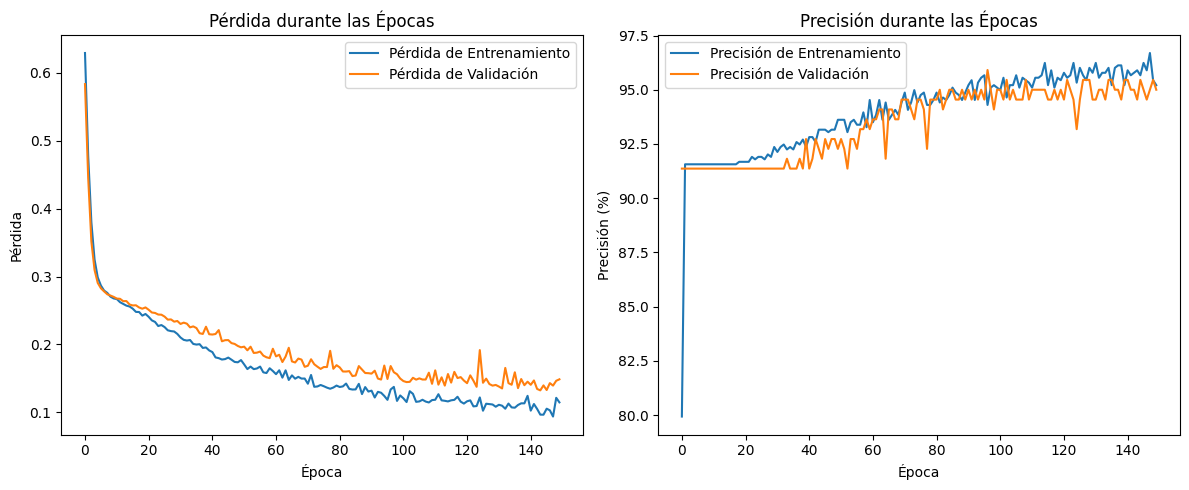

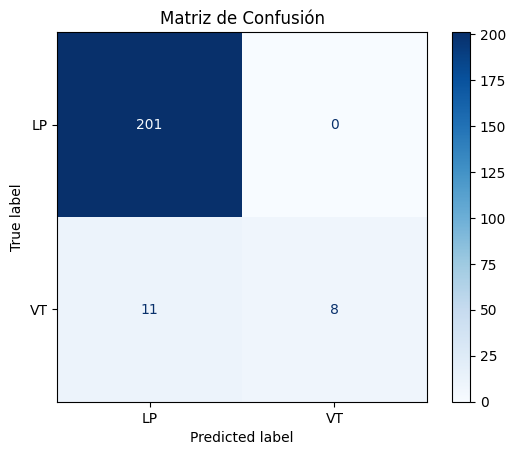

              precision    recall  f1-score   support

          LP       0.95      1.00      0.97       201
          VT       1.00      0.42      0.59        19

    accuracy                           0.95       220
   macro avg       0.97      0.71      0.78       220
weighted avg       0.95      0.95      0.94       220



In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Aseguramos la reproducibilidad
torch.manual_seed(42)
np.random.seed(42)

# Paso 1: Preparación de los datos

# Supongamos que df_filtered es tu DataFrame que contiene las señales normalizadas y las etiquetas
# df_filtered['NormalizedSignal'] debe ser una columna con las señales de longitud 5000 (listas o arrays)
# df_filtered['Type'] debe ser una columna con las etiquetas ('VT' o 'LP')

# Convertir las señales en una matriz numpy
signals = np.stack(df_filtered['NormalizedSignal'].to_numpy())
print(f"Forma de signals: {signals.shape}")  # Debería ser (n_samples, 5000)

# Convertir a tensor y añadir una dimensión para canales (necesario para Conv1d)
signals_tensor = torch.tensor(signals, dtype=torch.float32).unsqueeze(1)  # Ahora tiene forma (n_samples, 1, 5000)
print(f"Forma de signals_tensor: {signals_tensor.shape}")

# Preparar las etiquetas
le = LabelEncoder()
labels = le.fit_transform(df_filtered['Type'])  # Convertir etiquetas a 0 y 1
labels_tensor = torch.tensor(labels, dtype=torch.long)  # Asegurar que las etiquetas sean del tipo correcto

# Paso 2: División en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(signals_tensor, labels_tensor, test_size=0.2, random_state=42, stratify=labels)

# Crear datasets y dataloaders
batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Paso 3: Definición del modelo CNN 1D

class SeismicCNN(nn.Module):
    def __init__(self, input_length):
        super(SeismicCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=7, padding=3)
        self.bn1 = nn.BatchNorm1d(16)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(32)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(64)
        # Calcular la longitud después de las capas de pooling
        self.pool = nn.MaxPool1d(2)
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 clases: VT y LP

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)  # Aplanar
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Inicializar el modelo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Usando dispositivo: {device}")

model = SeismicCNN(input_length=signals_tensor.shape[2])
model.to(device)

# Paso 4: Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Paso 5: Entrenamiento del modelo
num_epochs = 150
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / total_train
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validación
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / total_val
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

# Paso 6: Graficar los resultados

# Graficar la pérdida (loss)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida de Entrenamiento')
plt.plot(val_losses, label='Pérdida de Validación')
plt.title('Pérdida durante las Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión (accuracy)
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Precisión de Entrenamiento')
plt.plot(val_accuracies, label='Precisión de Validación')
plt.title('Precisión durante las Épocas')
plt.xlabel('Época')
plt.ylabel('Precisión (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Paso 7: Evaluación final y matriz de confusión

# Recolectar las predicciones para la matriz de confusión
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calcular la matriz de confusión
cm = confusion_matrix(all_labels, all_preds)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(all_labels, all_preds, target_names=le.classes_))


Usando dispositivo: cuda


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/100, Train Loss: 0.6704, Train Acc: 58.95%, Val Loss: 0.3069, Val Acc: 91.36%
Epoch 2/100, Train Loss: 0.3004, Train Acc: 91.56%, Val Loss: 0.3002, Val Acc: 91.36%
Epoch 3/100, Train Loss: 0.2904, Train Acc: 91.56%, Val Loss: 0.2966, Val Acc: 91.36%
Epoch 4/100, Train Loss: 0.2853, Train Acc: 91.56%, Val Loss: 0.2969, Val Acc: 91.36%
Epoch 5/100, Train Loss: 0.2932, Train Acc: 91.56%, Val Loss: 0.2967, Val Acc: 91.36%
Epoch 6/100, Train Loss: 0.2856, Train Acc: 91.56%, Val Loss: 0.2964, Val Acc: 91.36%
Epoch 7/100, Train Loss: 0.2854, Train Acc: 91.56%, Val Loss: 0.2965, Val Acc: 91.36%
Epoch 8/100, Train Loss: 0.2851, Train Acc: 91.56%, Val Loss: 0.2965, Val Acc: 91.36%
Epoch 9/100, Train Loss: 0.2934, Train Acc: 91.56%, Val Loss: 0.2964, Val Acc: 91.36%
Epoch 10/100, Train Loss: 0.2890, Train Acc: 91.56%, Val Loss: 0.2963, Val Acc: 91.36%
Epoch 11/100, Train Loss: 0.2892, Train Acc: 91.56%, Val Loss: 0.2963, Val Acc: 91.36%
Epoch 12/100, Train Loss: 0.2861, Train Acc: 91.56%,

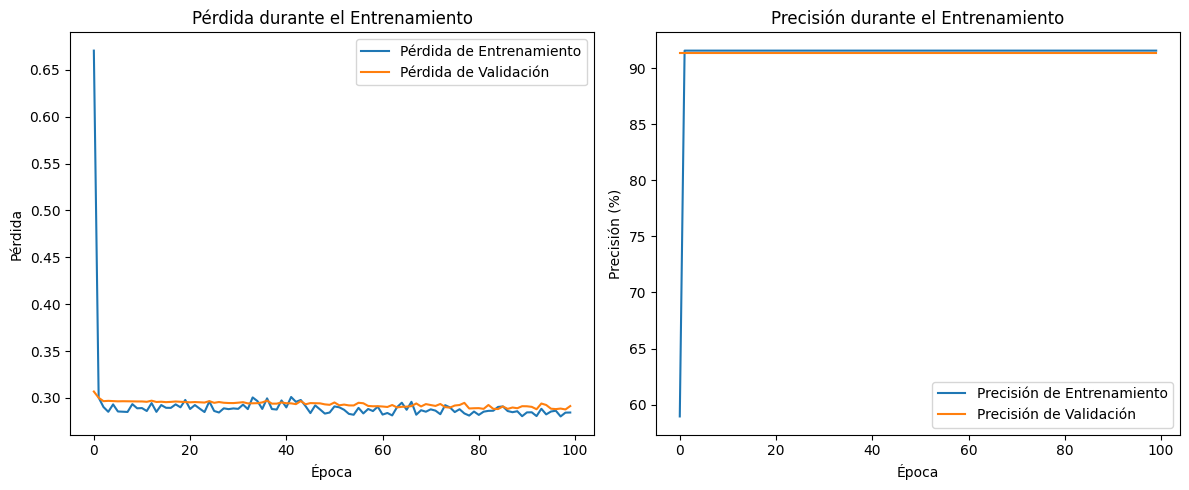

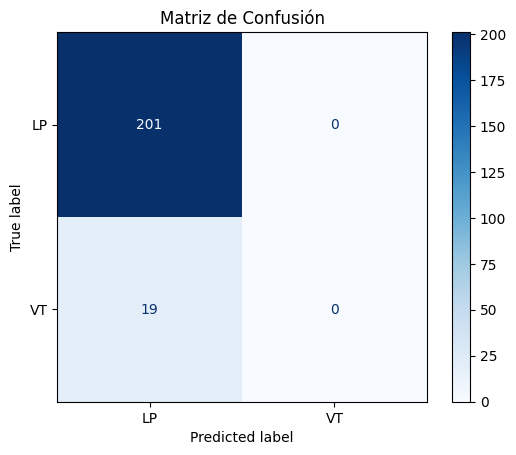

              precision    recall  f1-score   support

          LP       0.91      1.00      0.95       201
          VT       0.00      0.00      0.00        19

    accuracy                           0.91       220
   macro avg       0.46      0.50      0.48       220
weighted avg       0.83      0.91      0.87       220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Asegurarse de que PyTorch está utilizando la GPU si está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

# Paso 1: Preparar los datos
# Convertir las señales en un tensor y añadir una dimensión de características si es necesario

signals = np.stack(df_filtered['NormalizedSignal'].to_numpy())
signals = torch.tensor(signals, dtype=torch.float32)
signals = signals.unsqueeze(-1)  # Añadir dimensión de características: [batch_size, seq_length, 1]

# Convertir las etiquetas a tensores
le = LabelEncoder()
labels = le.fit_transform(df_filtered['Type'])
labels = torch.tensor(labels, dtype=torch.long)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    signals, labels, test_size=0.2, random_state=42, stratify=labels
)

# Crear datasets y dataloaders
batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

class TimeSeriesTransformer(nn.Module):
    def __init__(
        self, input_size, num_classes, d_model=64, nhead=8, num_layers=3,
        dim_feedforward=128, dropout=0.1
    ):
        super(TimeSeriesTransformer, self).__init__()
        self.input_layer = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward,
            dropout=dropout, activation='relu'
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, src):
        # src shape: [batch_size, seq_length, input_size]
        src = self.input_layer(src)  # [batch_size, seq_length, d_model]
        src = src.permute(1, 0, 2)   # [seq_length, batch_size, d_model]
        output = self.transformer_encoder(src)  # [seq_length, batch_size, d_model]
        output = output.mean(dim=0)  # Global average pooling: [batch_size, d_model]
        output = self.fc(output)     # [batch_size, num_classes]
        return output
# Parámetros del modelo
input_size = signals.shape[2]  # Debe ser 1 ya que agregamos una dimensión de características
num_classes = len(le.classes_)
num_epochs = 100
learning_rate = 1e-4

# Instanciar el modelo
model = TimeSeriesTransformer(input_size=input_size, num_classes=num_classes)
model.to(device)

# Definir la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Listas para almacenar pérdidas y precisiones
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Entrenamiento
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validación
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')

# Graficar pérdidas y precisiones
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Pérdida de Entrenamiento')
plt.plot(val_losses, label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Precisión de Entrenamiento')
plt.plot(val_accuracies, label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión (%)')
plt.title('Precisión durante el Entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluación en el conjunto de validación
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Matriz de confusión
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(all_labels, all_preds, target_names=le.classes_))



##Modelo con Espectrogramas y transformers

### espectorgrama resolucion normales

####Test 1

/usr/local/lib/python3.10/dist-packages/librosa/display.py:1255: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  if __same_axes(x_axis, y_axis, axes.get_xlim(), axes.get_ylim()) and auto_aspect:


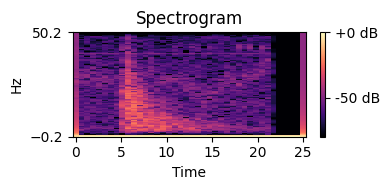

(1097, 129, 40)
(1097, 129, 40)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 129, 40, 1)]         0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 127, 38, 64)          640       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 38, 64)          256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 19, 64)           0   

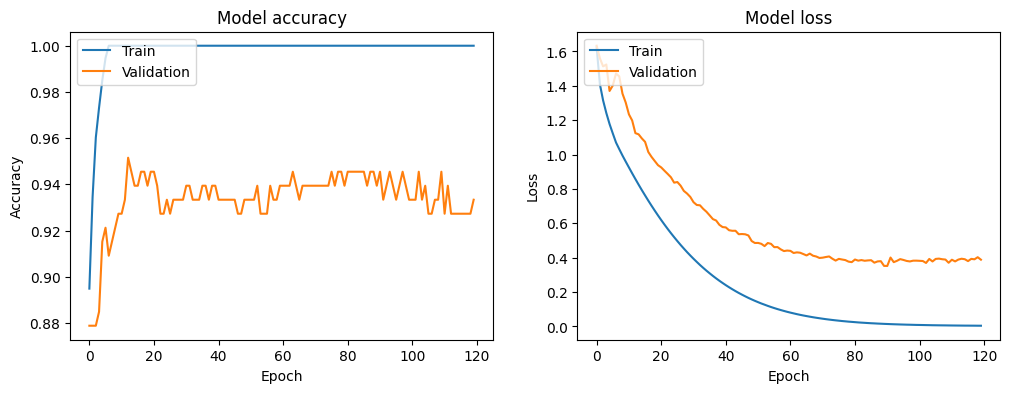

6/6 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.9333
Validation Loss: 0.388561874628067
Validation Accuracy: 0.9333333373069763
6/6 [==============================] - 0s 3ms/step


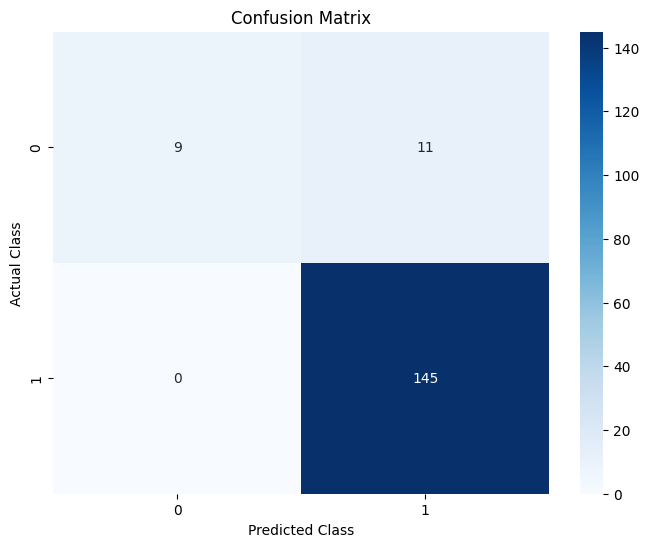

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Input

import librosa
import librosa.display

def generate_spectrogram(signal, sr=100):
    # sr es la tasa de muestreo (sampling rate), asumimos 100 Hz según tu descripción
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)
# def plot_spectrogram(spectrogram, sr=100):
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(spectrogram, sr=sr, hop_length=128, x_axis='time', y_axis='log')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Spectrogram')
#     plt.tight_layout()
#     plt.show()
def plot_spectrogram(spectrogram, sr=100):
    plt.figure(figsize=(4, 2))  # Aumentar el tamaño del gráfico
    librosa.display.specshow(spectrogram, sr=sr, hop_length=64, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()
spectrograms = []

for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)

df_filtered['Spectrogram'] = spectrograms

# Visualiza el primer espectrograma en el dataframe
plot_spectrogram(df_filtered['Spectrogram'].iloc[0])

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])
# X_spectrograms = np.array([spectrogram.T for spectrogram in df_filtered['Spectrogram']])
# Si los espectrogramas no tienen la misma forma, podrías necesitar ajustar las dimensiones.
# Verificar las dimensiones de los espectrogramas
print(X_spectrograms.shape)
print(X_spectrograms.shape)


# Normalizar el tamaño de los espectrogramas a un tamaño constante si es necesario
# Por ejemplo, si los espectrogramas tienen diferentes tamaños en la primera dimensión
fixed_size = X_spectrograms[0].shape[0]  # Tomar la primera dimensión de un espectrograma
X_spectrograms = np.array([np.pad(s, ((0, fixed_size - s.shape[0]), (0, 0)), 'constant') if s.shape[0] < fixed_size else s for s in X_spectrograms])

# PARA CONV2
X_spectrograms = X_spectrograms[..., np.newaxis]  # Añadir canal extra (para Conv2D)
y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values  # Convertir las etiquetas a valores numéricos
y = to_categorical(y, num_classes=2)  # Convertir las etiquetas a formato one-hot

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])  # Residual Connection
    out1 = LayerNormalization(epsilon=1e-6)(out1)

    # Feed Forward Network
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = Add()([out1, ffn_output])  # Residual Connection
    return LayerNormalization(epsilon=1e-6)(out2)


def build_high_res_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)

    # Bloques Convolucionales para extraer características
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar para pasar a los bloques Transformer
    x = Flatten()(x)
    x = Dense(head_size)(x)  # Proyectar las dimensiones
    x = Reshape((1, head_size))(x)  # Cambiar la forma para los bloques Transformer

    # Bloques Transformer
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Capa MLP para la clasificación
    x = Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu", kernel_regularizer='l2')(x)  # Regularización L2
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(2, activation="softmax")(x)

    return Model(inputs, outputs)

# Parámetros del modelo ajustado
input_shape = X_spectrograms[0].shape  # Forma del espectrograma de alta resolución
model = build_high_res_transformer_model(
    input_shape=input_shape,
    head_size=128,  # Tamaño de las cabezas
    num_heads=4,    # Número de cabezas
    ff_dim=128,     # Dimensión de la red Feed Forward
    num_transformer_blocks=2,  # Bloques Transformer
    mlp_units=[128],  # Capas densas
    dropout=0.1,  # Dropout en los bloques Transformer
    mlp_dropout=0.3  # Dropout en las capas densas
)

# Compilar el modelo
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

model.summary()
# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.15, random_state=42)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=120,  # Ajustable según rendimiento
    batch_size=32,
    callbacks=[]  # Usamos callbacks para ajustar la tasa de aprendizaje y detener el entrenamiento si es necesario
)

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()




#### TEST 2 bueno

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 129, 40, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 127, 38, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 17, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 15360)             0   

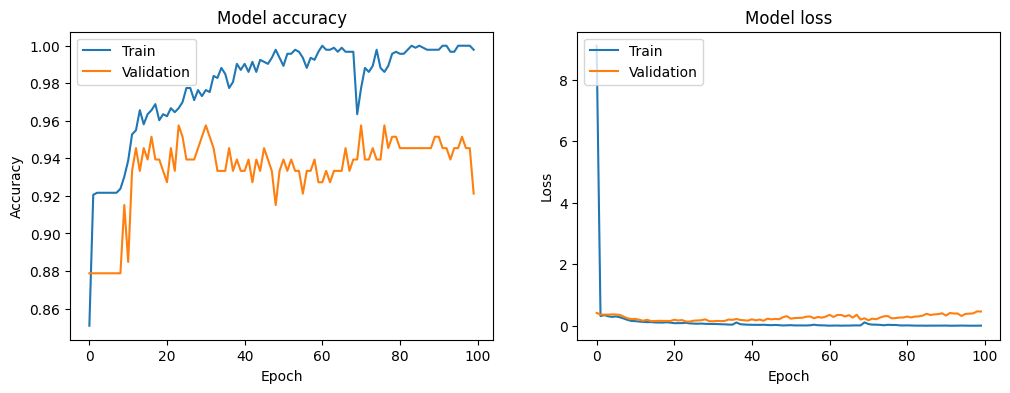

6/6 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.9212
Validation Loss: 0.46462222933769226
Validation Accuracy: 0.9212121367454529
6/6 [==============================] - 0s 1ms/step


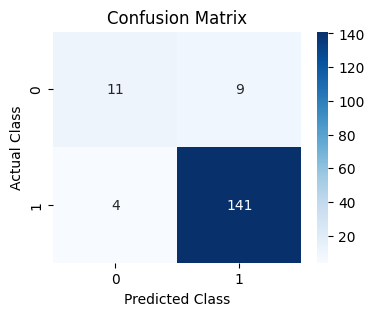

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Función para generar espectrogramas a partir de las señales
def generate_spectrogram(signal, sr=100):
    # sr es la tasa de muestreo (sampling rate), asumimos 100 Hz
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

# Función para visualizar un espectrograma
def plot_spectrogram(spectrogram, sr=100):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=128, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

# Convertir las señales normalizadas a espectrogramas
spectrograms = []

for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)

# Añadir los espectrogramas al DataFrame
df_filtered['Spectrogram'] = spectrograms

# Visualizar un espectrograma de ejemplo (opcional)
# plot_spectrogram(df_filtered['Spectrogram'].iloc[0])

# Preparar los datos para el modelo
X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])

# Añadir un canal adicional para Conv2D (canal de color en escala de grises)
X_spectrograms = X_spectrograms[..., np.newaxis]

# Preparar las etiquetas
y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values  # Convertir las etiquetas a valores numéricos
y = to_categorical(y, num_classes=2)  # Convertir las etiquetas a formato one-hot

# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.15, random_state=42)

# Definir la arquitectura del modelo
def build_spectrogram_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Crear y compilar el modelo
input_shape = X_spectrograms[0].shape  # Obtener la forma de los espectrogramas
model = build_spectrogram_model(input_shape)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val))

# Visualizar el progreso del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()




#### test2.1 mas robusto

/usr/local/lib/python3.10/dist-packages/librosa/display.py:1255: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  if __same_axes(x_axis, y_axis, axes.get_xlim(), axes.get_ylim()) and auto_aspect:


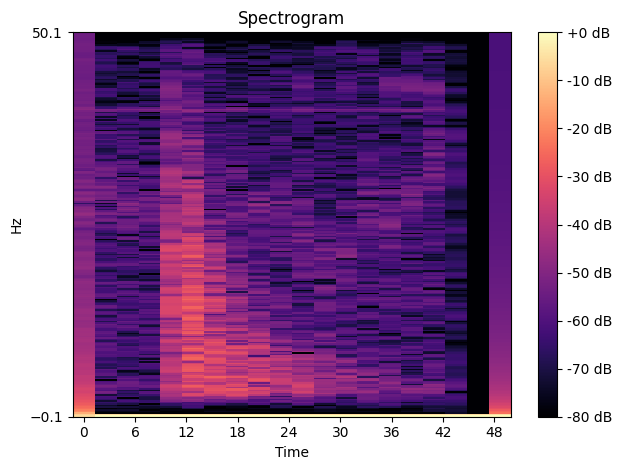

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 257, 20, 1)]         0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 257, 20, 32)          320       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_12 (Ba  (None, 257, 20, 32)          128       ['conv2d_14[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_11 (MaxPooli  (None, 128, 10, 32)          0         ['batch_normalization_12

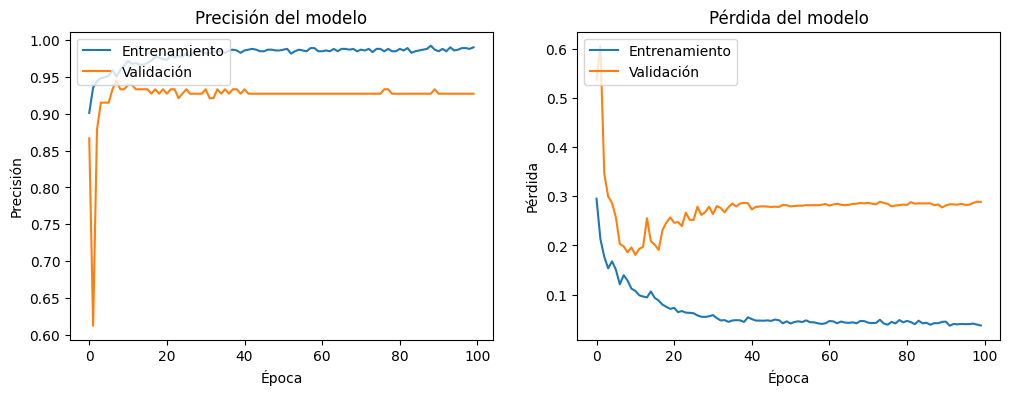

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     MultiHeadAttention, LayerNormalization, Add,
                                     GlobalAveragePooling1D, BatchNormalization, Reshape)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=512, hop_length=256)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

spectrograms = []

for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)

df_filtered['Spectrogram'] = spectrograms

librosa.display.specshow(df_filtered['Spectrogram'].iloc[0], sr=100, hop_length=256, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

X_spectrograms = np.array(df_filtered['Spectrogram'].tolist())
X_spectrograms = X_spectrograms[..., np.newaxis]

y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.15, random_state=42)

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])
    out1 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = Add()([out1, ffn_output])
    return LayerNormalization(epsilon=1e-6)(out2)

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Reshape((-1, x.shape[-1]))(x)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(2, activation="softmax")(x)

    return Model(inputs, outputs)

input_shape = X_spectrograms.shape[1:]
model = build_transformer_model(
    input_shape=input_shape,
    head_size=64,
    num_heads=4,
    ff_dim=128,
    num_transformer_blocks=4,
    mlp_units=[128],
    dropout=0.2,
    mlp_dropout=0.3
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr]
    # callbacks=[early_stopping, reduce_lr]
)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()


6/6 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.9273
Validation Loss: 0.28877806663513184
Validation Accuracy: 0.9272727370262146
6/6 [==============================] - 0s 3ms/step


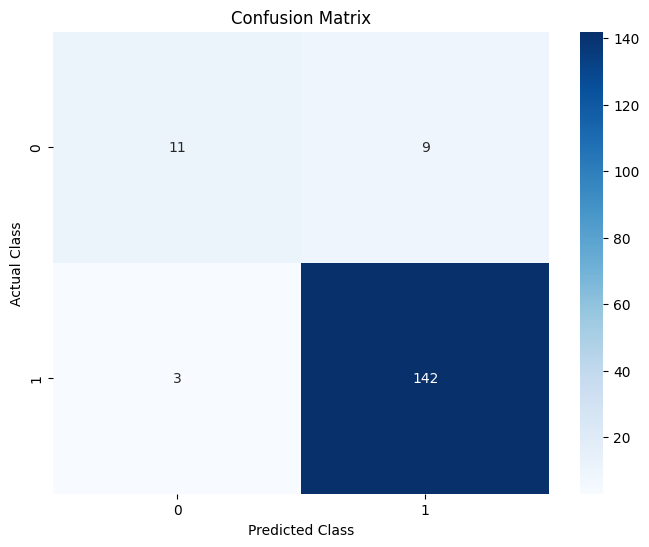

6/6 [==============================] - 0s 4ms/step - loss: 0.2888 - accuracy: 0.9273
Validation Loss: 0.28877806663513184
Validation Accuracy: 0.9272727370262146
6/6 [==============================] - 0s 3ms/step


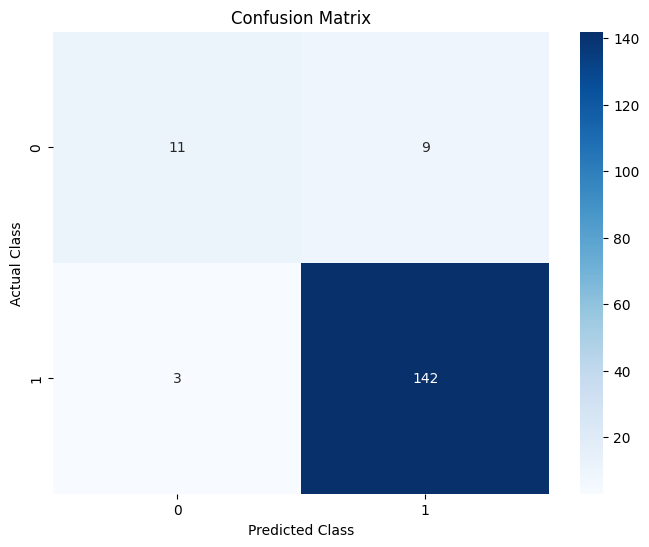

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()
# CON EARLYStopping y ReduceLROnPlateau
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### test 2

/usr/local/lib/python3.10/dist-packages/librosa/display.py:1255: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  if __same_axes(x_axis, y_axis, axes.get_xlim(), axes.get_ylim()) and auto_aspect:


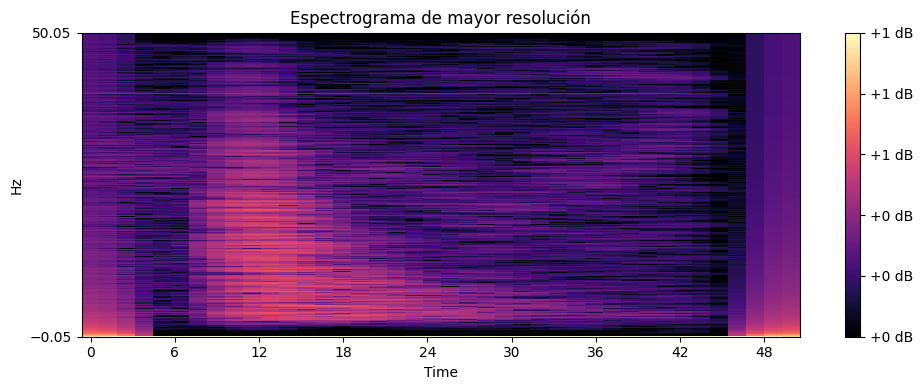

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 513, 40, 1)]         0         []                            
                                                                                                  
 conv2d_23 (Conv2D)          (None, 513, 40, 64)          640       ['input_7[0][0]']             
                                                                                                  
 batch_normalization_21 (Ba  (None, 513, 40, 64)          256       ['conv2d_23[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 conv2d_24 (Conv2D)          (None, 513, 40, 64)          36928     ['batch_normalization_21

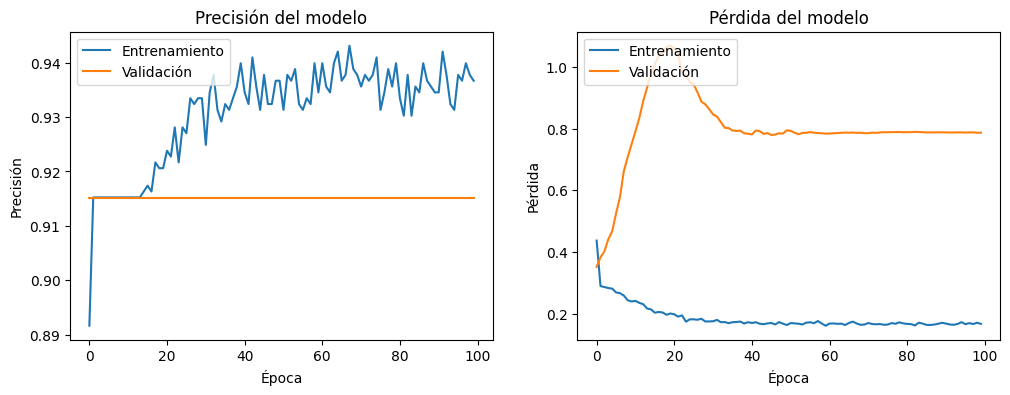

6/6 [==============================] - 0s 24ms/step - loss: 0.7865 - accuracy: 0.9152
Validation Loss: 0.7865384221076965
Validation Accuracy: 0.9151515364646912
6/6 [==============================] - 0s 23ms/step


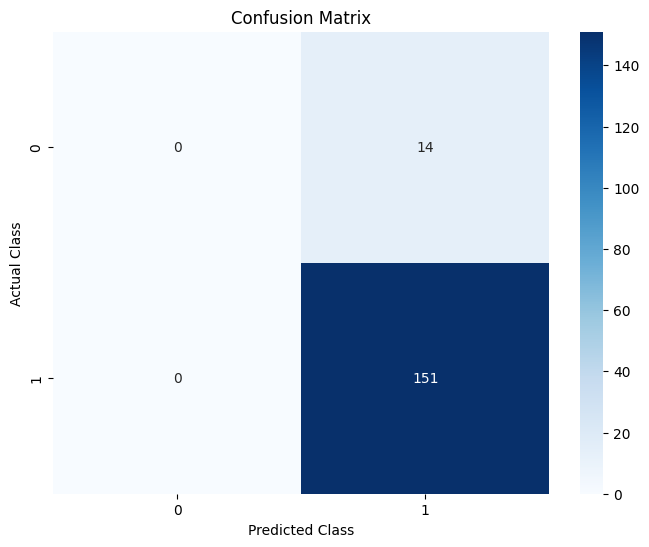

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     MultiHeadAttention, LayerNormalization, Add,
                                     GlobalAveragePooling1D, BatchNormalization, Reshape)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Paso 1: Generar espectrogramas de mayor resolución
def generate_spectrogram(signal, sr=100):
    # Aumentamos n_fft y disminuimos hop_length para mejorar la resolución
    n_fft = 1024
    hop_length = 128
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    # Normalizamos el espectrograma
    spectrogram_db = (spectrogram_db - spectrogram_db.min()) / (spectrogram_db.max() - spectrogram_db.min())
    return spectrogram_db

spectrograms = []

for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)

df_filtered['Spectrogram'] = spectrograms

# Visualizar el primer espectrograma para verificar
plt.figure(figsize=(10, 4))
librosa.display.specshow(df_filtered['Spectrogram'].iloc[0], sr=100, hop_length=128, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de mayor resolución')
plt.tight_layout()
plt.show()

# Paso 2: Preparar los espectrogramas para el entrenamiento
X_spectrograms = np.array(df_filtered['Spectrogram'].tolist())
X_spectrograms = X_spectrograms[..., np.newaxis]

# Paso 3: Preparar las etiquetas
y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

# Paso 4: Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.15, random_state=42, stratify=y)

# Paso 5: Definir el bloque Transformer modificado
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])
    out1 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = Add()([out1, ffn_output])
    return LayerNormalization(epsilon=1e-6)(out2)

# Paso 6: Construcción del modelo con modificaciones
def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout)(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout)(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout)(x)

    # Aplanamos y preparamos para el Transformer
    x = Reshape((-1, x.shape[-1]))(x)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(2, activation="softmax")(x)

    return Model(inputs, outputs)

input_shape = X_spectrograms.shape[1:]
model = build_transformer_model(
    input_shape=input_shape,
    head_size=128,   # Aumentamos el tamaño de las cabezas de atención
    num_heads=8,     # Incrementamos el número de cabezas
    ff_dim=256,      # Aumentamos la dimensión de la red feed-forward
    num_transformer_blocks=6,  # Incrementamos el número de bloques Transformer
    mlp_units=[512, 256],
    dropout=0.3,
    mlp_dropout=0.4
)

# Probar con el optimizador SGD y una tasa de aprendizaje ajustada
optimizer = SGD(learning_rate=1e-3, momentum=0.9)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

model.summary()

# Paso 7: Entrenamiento del modelo con Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr]
    # callbacks=[early_stopping, reduce_lr]
)

# Paso 8: Visualización de los resultados del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#### test 3

Distribución de clases después del aumento de datos: {0: 744, 1: 1004}
Model: "model_54"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_80 (InputLayer)       [(None, 513, 40, 1)]         0         []                            
                                                                                                  
 conv2d_204 (Conv2D)         (None, 513, 40, 64)          640       ['input_80[0][0]']            
                                                                                                  
 batch_normalization_169 (B  (None, 513, 40, 64)          256       ['conv2d_204[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 conv2d_205 (Conv2D)

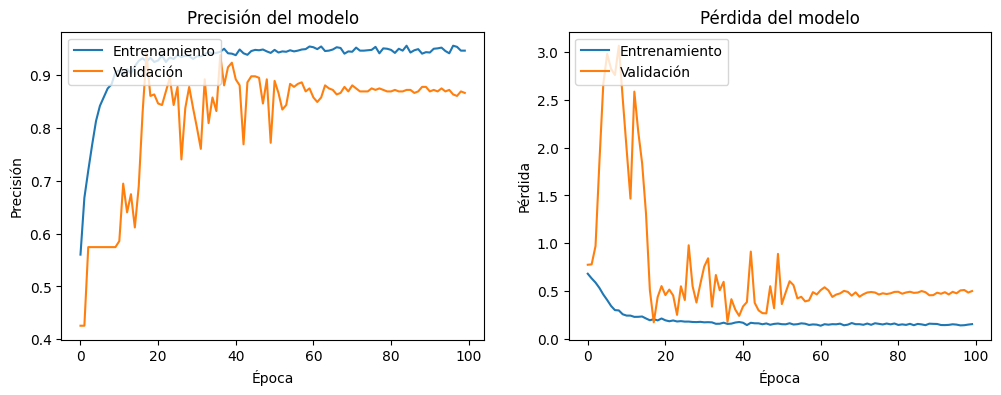

11/11 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

          VT       0.78      0.95      0.86       149
          LP       0.96      0.80      0.87       201

    accuracy                           0.87       350
   macro avg       0.87      0.88      0.87       350
weighted avg       0.88      0.87      0.87       350

Matriz de confusión:
[[142   7]
 [ 40 161]]


In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
                                     MultiHeadAttention, LayerNormalization, Add,
                                     GlobalAveragePooling1D, BatchNormalization, Reshape)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Paso 1: Generar espectrogramas con aumento de datos para la clase minoritaria
def generate_spectrogram(signal, sr=100):
    n_fft = 1024
    hop_length = 128
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    spectrogram_db = (spectrogram_db - spectrogram_db.min()) / (spectrogram_db.max() - spectrogram_db.min())
    return spectrogram_db

def augment_signal(signal, sr=100):
    augmented_signals = []
    # Original signal
    augmented_signals.append(signal)
    # Desplazamiento en el tiempo
    max_shift = int(0.1 * len(signal))  # Desplazamiento máximo del 10%
    for shift in [max_shift, -max_shift]:
        shifted_signal = np.roll(signal, shift)
        augmented_signals.append(shifted_signal)
    # Estiramiento en el tiempo
    for rate in [0.9, 1.1]:
        stretched_signal = librosa.effects.time_stretch(signal.astype('float'), rate=rate)
        # Ajustar la longitud al original
        if len(stretched_signal) > len(signal):
            stretched_signal = stretched_signal[:len(signal)]
        else:
            stretched_signal = np.pad(stretched_signal, (0, len(signal) - len(stretched_signal)), 'constant')
        augmented_signals.append(stretched_signal)
    # Cambio de tono
    for n_steps in [-2, 2]:
        pitched_signal = librosa.effects.pitch_shift(signal.astype('float'), sr = sr, n_steps=n_steps)
        augmented_signals.append(pitched_signal)
    # Añadir ruido
    noise_amp = 0.005 * np.random.uniform() * np.amax(signal)
    noisy_signal = signal + noise_amp * np.random.normal(size=signal.shape[0])
    augmented_signals.append(noisy_signal)
    return augmented_signals

# Generar espectrogramas y aplicar aumento de datos a la clase minoritaria
spectrograms = []
labels = []

for idx, row in df_filtered.iterrows():
    signal = row['NormalizedSignal']
    label = row['Type']
    if label == 'VT':  # Suponiendo que 'VT' es la clase minoritaria
        # Aplicar aumento de datos
        augmented_signals = augment_signal(signal)
        for aug_signal in augmented_signals:
            spectrogram = generate_spectrogram(aug_signal)
            spectrograms.append(spectrogram)
            labels.append(label)
    else:
        # Usar la señal original
        spectrogram = generate_spectrogram(signal)
        spectrograms.append(spectrogram)
        labels.append(label)

# Convertir a arrays numpy
X_spectrograms = np.array(spectrograms)
X_spectrograms = X_spectrograms[..., np.newaxis]

# Actualizar las etiquetas
y = np.array(labels)
y = np.where(y == 'VT', 0, 1)  # 'VT' es 0, 'LP' es 1
y = to_categorical(y, num_classes=2)

# Paso 2: Mezclar los datos para evitar cualquier ordenamiento
from sklearn.utils import shuffle
X_spectrograms, y = shuffle(X_spectrograms, y, random_state=42)

# Paso 3: Verificar el balance de clases
unique, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
print(f'Distribución de clases después del aumento de datos: {dict(zip(unique, counts))}')

# Paso 4: Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.20, random_state=42, stratify=y)

# Paso 5: Construir y entrenar el modelo (puedes usar el modelo anterior o ajustarlo)
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])
    out1 = LayerNormalization(epsilon=1e-6)(out1)
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)
    out2 = Add()([out1, ffn_output])
    return LayerNormalization(epsilon=1e-6)(out2)

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout)(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout)(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(dropout)(x)

    # Aplanar y preparar para el Transformer
    x = Reshape((-1, x.shape[-1]))(x)

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)

    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(2, activation="softmax")(x)

    return Model(inputs, outputs)

input_shape = X_spectrograms.shape[1:]
model = build_transformer_model(
    input_shape=input_shape,
    head_size=128,
    num_heads=8,
    ff_dim=256,
    num_transformer_blocks=6,
    mlp_units=[512, 256],
    dropout=0.3,
    mlp_dropout=0.4
)

optimizer = SGD(learning_rate=1e-3, momentum=0.9)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

model.summary()

# Paso 6: Entrenamiento del modelo con Early Stopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[reduce_lr]
)

# Paso 7: Visualización de los resultados del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 8: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)


#### test 4


#### test 5 - modelo preentrenado de imagenNet

In [ ]:
pip install librosa --upgrade


Distribución de clases después del aumento de datos: {0: 93, 1: 1004}
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_31 (Ba  (None, 1280)              5120      
 tchNormalization)                                               
                                                                 
 dropout_79 (Dropout)        (None, 1280)             

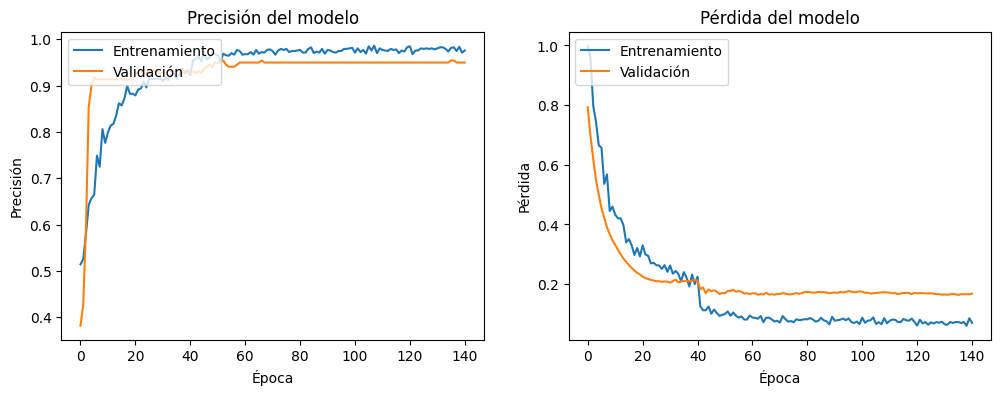

7/7 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

          VT       0.80      0.21      0.33        19
          LP       0.93      1.00      0.96       201

    accuracy                           0.93       220
   macro avg       0.87      0.60      0.65       220
weighted avg       0.92      0.93      0.91       220

Matriz de confusión:
[[  4  15]
 [  1 200]]


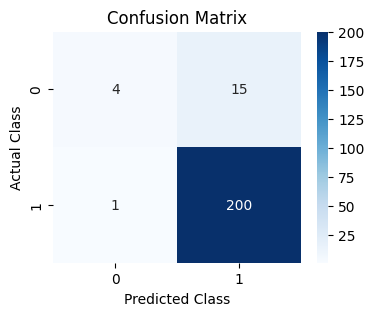

Epoch 1/50
28/28 [==============================] - 13s 86ms/step - loss: 0.2275 - accuracy: 0.9179 - val_loss: 0.1991 - val_accuracy: 0.9273 - lr: 1.0000e-05
Epoch 2/50
28/28 [==============================] - 1s 41ms/step - loss: 0.2102 - accuracy: 0.9259 - val_loss: 0.1851 - val_accuracy: 0.9273 - lr: 1.0000e-05
Epoch 3/50
28/28 [==============================] - 1s 42ms/step - loss: 0.2092 - accuracy: 0.9259 - val_loss: 0.1787 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 4/50
28/28 [==============================] - 1s 39ms/step - loss: 0.2099 - accuracy: 0.9236 - val_loss: 0.2009 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 5/50
28/28 [==============================] - 1s 33ms/step - loss: 0.2084 - accuracy: 0.9327 - val_loss: 0.1816 - val_accuracy: 0.9364 - lr: 1.0000e-05
Epoch 6/50
28/28 [==============================] - 1s 30ms/step - loss: 0.2000 - accuracy: 0.9293 - val_loss: 0.1755 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 7/50
28/28 [==============================] -

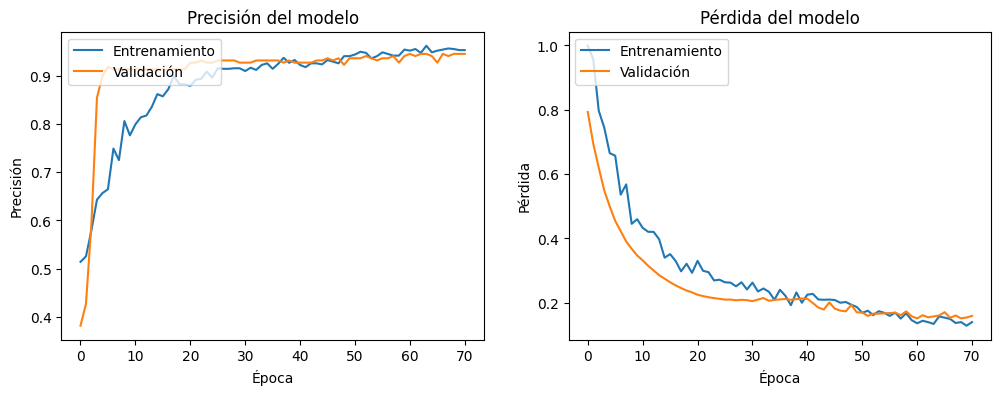

7/7 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

          VT       0.89      0.42      0.57        19
          LP       0.95      1.00      0.97       201

    accuracy                           0.95       220
   macro avg       0.92      0.71      0.77       220
weighted avg       0.94      0.95      0.94       220

Matriz de confusión:
[[  8  11]
 [  1 200]]


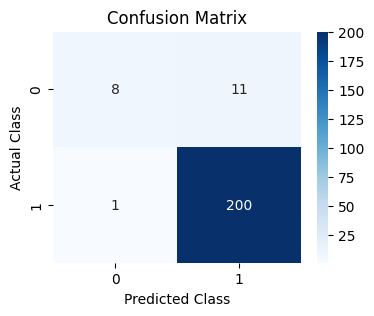

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf

# Paso 1: Generar espectrogramas con aumento de datos para la clase minoritaria
def generate_spectrogram(signal, sr=100):
    n_fft = 512
    hop_length = 256
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    # Convertir a 3 canales para adaptarse a EfficientNet
    spectrogram_db = np.stack((spectrogram_db,)*3, axis=-1)
    # Normalizar entre 0 y 255
    spectrogram_db = (spectrogram_db - spectrogram_db.min()) / (spectrogram_db.max() - spectrogram_db.min())
    spectrogram_db = spectrogram_db * 255.0
    return spectrogram_db

# def augment_signal(signal, sr=100):
#     augmented_signals = []
#     augmented_signals.append(signal)
#     max_shift = int(0.1 * len(signal))
#     for shift in [max_shift, -max_shift]:
#         shifted_signal = np.roll(signal, shift)
#         augmented_signals.append(shifted_signal)
#     for rate in [0.9, 1.1]:
#         stretched_signal = librosa.effects.time_stretch(signal.astype('float'), rate)
#         if len(stretched_signal) > len(signal):
#             stretched_signal = stretched_signal[:len(signal)]
#         else:
#             stretched_signal = np.pad(stretched_signal, (0, len(signal) - len(stretched_signal)), 'constant')
#         augmented_signals.append(stretched_signal)
#     for n_steps in [-2, 2]:
#         pitched_signal = librosa.effects.pitch_shift(signal.astype('float'), sr, n_steps=n_steps)
#         augmented_signals.append(pitched_signal)
#     noise_amp = 0.005 * np.random.uniform() * np.amax(signal)
#     noisy_signal = signal + noise_amp * np.random.normal(size=signal.shape[0])
#     augmented_signals.append(noisy_signal)
#     return augmented_signals

spectrograms = []
labels = []

for idx, row in df_filtered.iterrows():
    signal = row['NormalizedSignal']
    label = row['Type']
    if label == 'VT':
        # augmented_s ignals = augment_signal(signal)
        # for aug_signal in augmented_signals:
        #     spectrogram = generate_spectrogram(aug_signal)
        #     spectrograms.append(spectrogram)
        #     labels.append(label)
        spectrogram = generate_spectrogram(signal)
        spectrograms.append(spectrogram)
        labels.append(label)
    else:
        spectrogram = generate_spectrogram(signal)
        spectrograms.append(spectrogram)
        labels.append(label)

X_spectrograms = np.array(spectrograms)
# Redimensionar espectrogramas al tamaño que espera EfficientNetB0 (224x224)
import cv2
X_spectrograms_resized = []
for img in X_spectrograms:
    img_resized = cv2.resize(img, (224, 224))
    X_spectrograms_resized.append(img_resized)
X_spectrograms_resized = np.array(X_spectrograms_resized)

# Preprocesar las imágenes según EfficientNetB0
X_spectrograms_resized = preprocess_input(X_spectrograms_resized)

y = np.array(labels)
y = np.where(y == 'VT', 0, 1)
y = to_categorical(y, num_classes=2)

from sklearn.utils import shuffle
X_spectrograms_resized, y = shuffle(X_spectrograms_resized, y, random_state=42)

unique, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
print(f'Distribución de clases después del aumento de datos: {dict(zip(unique, counts))}')

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms_resized, y, test_size=0.20, random_state=42, stratify=y)

# Paso 2: Definir el modelo preentrenado EfficientNetB0
def build_pretrained_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    # Congelar las capas base
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model,base_model

input_shape = (224, 224, 3)
num_classes = 2

model, base_model = build_pretrained_model(
    input_shape=input_shape,
    num_classes=num_classes
)

optimizer = Adam(learning_rate=1e-4)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

model.summary()

# Paso 3: Entrenamiento del modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Paso 5: Visualización de los resultados del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 6: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


# Paso 4: Descongelar algunas capas y reentrenar
base_model.trainable = True

# Congelar las primeras capas
fine_tune_at = len(base_model.layers) * 0.7  # Ajusta este valor según sea necesario
for layer in base_model.layers[:int(fine_tune_at)]:
    layer.trainable = False

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

history_fine = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

# Paso 5: Visualización de los resultados del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 6: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


Epoch 1/100
28/28 [==============================] - 13s 78ms/step - loss: 0.1257 - accuracy: 0.9544 - val_loss: 0.1827 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 2/100
28/28 [==============================] - 1s 30ms/step - loss: 0.1126 - accuracy: 0.9578 - val_loss: 0.1892 - val_accuracy: 0.9273 - lr: 1.0000e-05
Epoch 3/100
28/28 [==============================] - 1s 34ms/step - loss: 0.1124 - accuracy: 0.9624 - val_loss: 0.1694 - val_accuracy: 0.9318 - lr: 1.0000e-05
Epoch 4/100
28/28 [==============================] - 1s 35ms/step - loss: 0.1251 - accuracy: 0.9532 - val_loss: 0.1821 - val_accuracy: 0.9273 - lr: 1.0000e-05
Epoch 5/100
28/28 [==============================] - 1s 31ms/step - loss: 0.1008 - accuracy: 0.9704 - val_loss: 0.1761 - val_accuracy: 0.9364 - lr: 1.0000e-05
Epoch 6/100
28/28 [==============================] - 1s 28ms/step - loss: 0.1149 - accuracy: 0.9567 - val_loss: 0.1798 - val_accuracy: 0.9409 - lr: 1.0000e-05
Epoch 7/100
28/28 [==========================

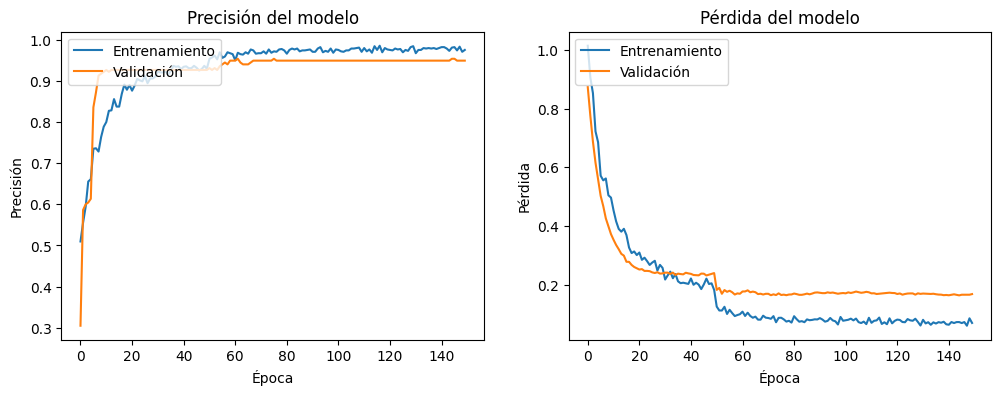

7/7 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

          VT       0.90      0.47      0.62        19
          LP       0.95      1.00      0.97       201

    accuracy                           0.95       220
   macro avg       0.93      0.73      0.80       220
weighted avg       0.95      0.95      0.94       220

Matriz de confusión:
[[  9  10]
 [  1 200]]


In [ ]:
def build_pretrained_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model, base_model


modelEXA, base_model = build_pretrained_model(
    input_shape=input_shape,
    num_classes=num_classes
)
# Paso 4: Descongelar algunas capas y reentrenar
base_model.trainable = True

# Congelar las primeras capas
fine_tune_at = len(base_model.layers) * 0.7  # Ajusta este valor según sea necesario
for layer in base_model.layers[:int(fine_tune_at)]:
    layer.trainable = False

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

history_fine = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    # callbacks=[early_stopping, reduce_lr]
    callbacks=[reduce_lr]
)

# Paso 5: Visualización de los resultados del entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_fine.history['loss'])
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 6: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)



Distribución de clases: {0: 93, 1: 1004}
Pesos de clase: {0: 5.89873417721519, 1: 0.5463071512309496}
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_33 (Ba  (None, 1280)              5120      
 tchNormalization)                                               
                                                                 
 dropout_81 (Dropout) 

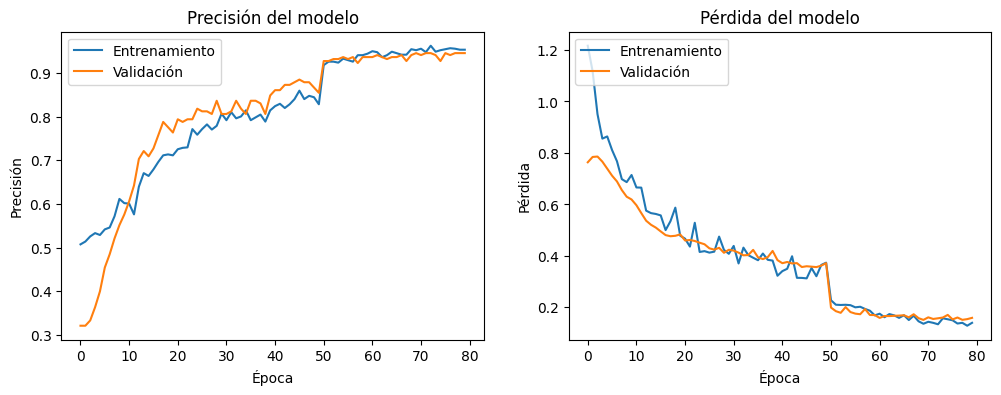

6/6 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

          VT       0.31      0.57      0.40        14
          LP       0.96      0.88      0.92       151

    accuracy                           0.85       165
   macro avg       0.63      0.73      0.66       165
weighted avg       0.90      0.85      0.87       165

Matriz de confusión:
[[  8   6]
 [ 18 133]]
Epoch 1/50
30/30 [==============================] - 13s 69ms/step - loss: 0.3112 - accuracy: 0.8659 - val_loss: 0.3302 - val_accuracy: 0.8667 - lr: 1.0000e-05
Epoch 2/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3354 - accuracy: 0.8487 - val_loss: 0.2908 - val_accuracy: 0.8970 - lr: 1.0000e-05
Epoch 3/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2982 - accuracy: 0.8423 - val_loss: 0.3216 - val_accuracy: 0.8727 - lr: 1.0000e-05
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3222 - accuracy: 0.8594 - v

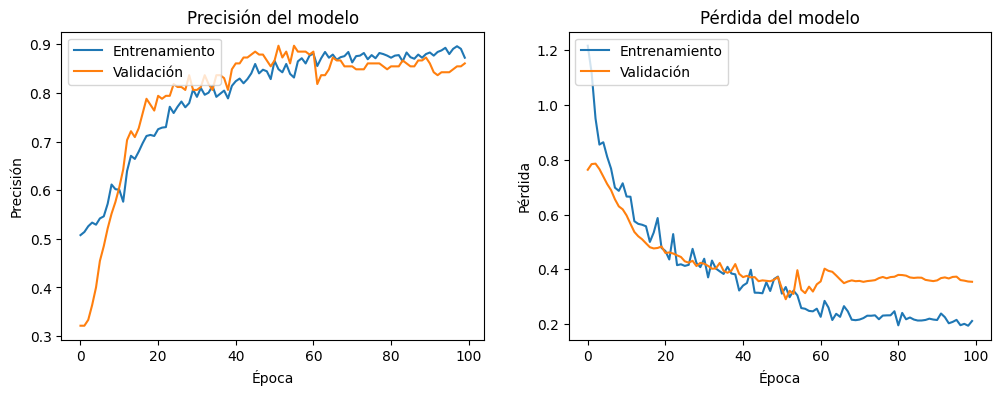

6/6 [==============================] - 1s 16ms/step
              precision    recall  f1-score   support

          VT       0.33      0.64      0.44        14
          LP       0.96      0.88      0.92       151

    accuracy                           0.86       165
   macro avg       0.65      0.76      0.68       165
weighted avg       0.91      0.86      0.88       165

Matriz de confusión:
[[  9   5]
 [ 18 133]]


In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf

# Paso 1: Generar espectrogramas sin aumento de datos
def generate_spectrogram(signal, sr=100):
    n_fft = 256
    hop_length = 128
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    # Convertir a 3 canales para adaptarse a EfficientNet
    spectrogram_db = np.stack((spectrogram_db,)*3, axis=-1)
    # Normalizar entre 0 y 255
    spectrogram_db = (spectrogram_db - spectrogram_db.min()) / (spectrogram_db.max() - spectrogram_db.min())
    spectrogram_db = spectrogram_db * 255.0
    return spectrogram_db

spectrograms = []
labels = []

for idx, row in df_filtered.iterrows():
    signal = row['NormalizedSignal']
    label = row['Type']
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
    labels.append(label)

X_spectrograms = np.array(spectrograms)
# Redimensionar espectrogramas al tamaño que espera EfficientNetB0 (224x224)
import cv2
X_spectrograms_resized = []
for img in X_spectrograms:
    img_resized = cv2.resize(img, (224, 224))
    X_spectrograms_resized.append(img_resized)
X_spectrograms_resized = np.array(X_spectrograms_resized)

# Preprocesar las imágenes según EfficientNetB0
X_spectrograms_resized = preprocess_input(X_spectrograms_resized)

y = np.array(labels)
y = np.where(y == 'VT', 0, 1)
y = to_categorical(y, num_classes=2)

from sklearn.utils import shuffle
X_spectrograms_resized, y = shuffle(X_spectrograms_resized, y, random_state=42)

unique, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
print(f'Distribución de clases: {dict(zip(unique, counts))}')

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms_resized, y, test_size=0.15, random_state=42, stratify=y)

# Paso 2: Calcular los pesos de clase para manejar el desequilibrio
from sklearn.utils import class_weight

y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)
class_weights = dict(enumerate(class_weights))
print(f'Pesos de clase: {class_weights}')

# Paso 3: Definir el modelo preentrenado EfficientNetB0
def build_pretrained_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    # Congelar las capas base
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model, base_model

input_shape = (224, 224, 3)
num_classes = 2

model,base_model = build_pretrained_model(
    input_shape=input_shape,
    num_classes=num_classes
)

optimizer = Adam(learning_rate=1e-4)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

model.summary()

# Paso 4: Entrenamiento del modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[reduce_lr]
)

# Paso 6: Visualización de los resultados del entrenamiento
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 7: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)



# Paso 5: Descongelar algunas capas y reentrenar
base_model.trainable = True

# Congelar las primeras capas
fine_tune_at = int(len(base_model.layers) * 0.7)  # Ajusta este valor según sea necesario
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

history_fine = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[reduce_lr]
)

# Paso 6: Visualización de los resultados del entrenamiento
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 7: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)


Distribución de clases: {0: 93, 1: 1004}
Pesos de clase: {0: 5.89873417721519, 1: 0.5463071512309496}
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 global_average_pooling2d_8  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 batch_normalization_35 (Ba  (None, 1280)              5120      
 tchNormalization)                                               
                                                                 
 dropout_83 (Dropout) 

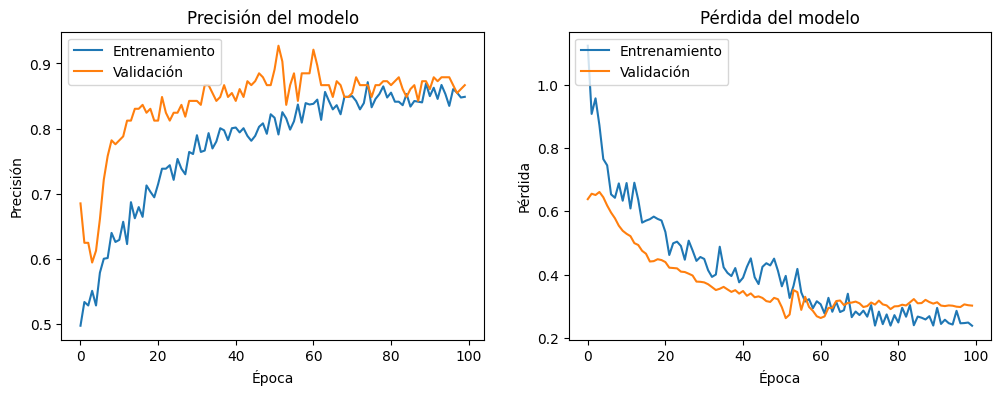

6/6 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

          VT       0.37      0.79      0.50        14
          LP       0.98      0.87      0.92       151

    accuracy                           0.87       165
   macro avg       0.67      0.83      0.71       165
weighted avg       0.93      0.87      0.89       165

Matriz de confusión:
[[ 11   3]
 [ 19 132]]


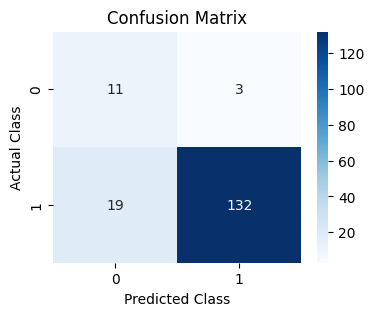

Epoch 1/50
30/30 [==============================] - 16s 71ms/step - loss: 0.3419 - accuracy: 0.8208 - val_loss: 0.2615 - val_accuracy: 0.9152 - lr: 1.0000e-05
Epoch 2/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3448 - accuracy: 0.8283 - val_loss: 0.2412 - val_accuracy: 0.9273 - lr: 1.0000e-05
Epoch 3/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3621 - accuracy: 0.8240 - val_loss: 0.2675 - val_accuracy: 0.9091 - lr: 1.0000e-05
Epoch 4/50
30/30 [==============================] - 1s 27ms/step - loss: 0.2952 - accuracy: 0.8294 - val_loss: 0.3208 - val_accuracy: 0.8424 - lr: 1.0000e-05
Epoch 5/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3730 - accuracy: 0.8326 - val_loss: 0.2298 - val_accuracy: 0.9333 - lr: 1.0000e-05
Epoch 6/50
30/30 [==============================] - 1s 27ms/step - loss: 0.3421 - accuracy: 0.8036 - val_loss: 0.2077 - val_accuracy: 0.9394 - lr: 1.0000e-05
Epoch 7/50
30/30 [==============================] -

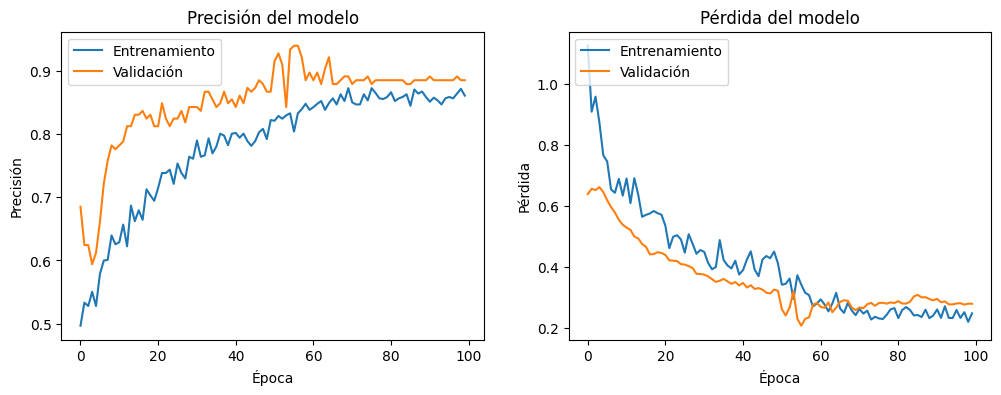

6/6 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

          VT       0.41      0.79      0.54        14
          LP       0.98      0.89      0.93       151

    accuracy                           0.88       165
   macro avg       0.69      0.84      0.74       165
weighted avg       0.93      0.88      0.90       165

Matriz de confusión:
[[ 11   3]
 [ 16 135]]


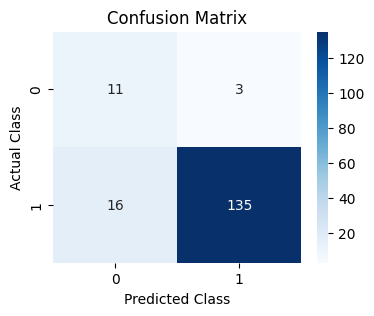

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf

# Paso 1: Generar espectrogramas sin aumento de datos
def generate_spectrogram(signal, sr=100):
    n_fft = 512
    hop_length = 256
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)
    # Convertir a 3 canales para adaptarse a EfficientNet
    spectrogram_db = np.stack((spectrogram_db,)*3, axis=-1)
    # Normalizar entre 0 y 255
    spectrogram_db = (spectrogram_db - spectrogram_db.min()) / (spectrogram_db.max() - spectrogram_db.min())
    spectrogram_db = spectrogram_db * 255.0
    return spectrogram_db

spectrograms = []
labels = []

for idx, row in df_filtered.iterrows():
    signal = row['NormalizedSignal']
    label = row['Type']
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
    labels.append(label)

X_spectrograms = np.array(spectrograms)
# Redimensionar espectrogramas al tamaño que espera EfficientNetB0 (224x224)
import cv2
X_spectrograms_resized = []
for img in X_spectrograms:
    img_resized = cv2.resize(img, (224, 224))
    X_spectrograms_resized.append(img_resized)
X_spectrograms_resized = np.array(X_spectrograms_resized)

# Preprocesar las imágenes según EfficientNetB0
X_spectrograms_resized = preprocess_input(X_spectrograms_resized)

y = np.array(labels)
y = np.where(y == 'VT', 0, 1)
y = to_categorical(y, num_classes=2)

from sklearn.utils import shuffle
X_spectrograms_resized, y = shuffle(X_spectrograms_resized, y, random_state=42)

unique, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
print(f'Distribución de clases: {dict(zip(unique, counts))}')

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms_resized, y, test_size=0.15, random_state=42, stratify=y)

# Paso 2: Calcular los pesos de clase para manejar el desequilibrio
from sklearn.utils import class_weight

y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_integers), y=y_integers)
class_weights = dict(enumerate(class_weights))
print(f'Pesos de clase: {class_weights}')

# Paso 3: Definir el modelo preentrenado EfficientNetB0
def build_pretrained_model(input_shape, num_classes):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
    # Congelar las capas base
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model,base_model

input_shape = (224, 224, 3)
num_classes = 2

model,base_model = build_pretrained_model(
    input_shape=input_shape,
    num_classes=num_classes
)

optimizer = Adam(learning_rate=1e-4)

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

model.summary()

# Paso 4: Entrenamiento del modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[reduce_lr]
)

# Paso 6: Visualización de los resultados del entrenamiento
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 7: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Paso 5: Descongelar algunas capas y reentrenar
base_model.trainable = True

# Congelar las primeras capas
fine_tune_at = int(len(base_model.layers) * 0.7)  # Ajusta este valor según sea necesario
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

history_fine = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[reduce_lr]
)

# Paso 6: Visualización de los resultados del entrenamiento
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']
loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 7: Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


#### con VIT

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_35 (InputLayer)       [(None, 129, 40, 1)]         0         []                            
                                                                                                  
 conv2d_62 (Conv2D)          (None, 129, 40, 32)          320       ['input_35[0][0]']            
                                                                                                  
 batch_normalization_69 (Ba  (None, 129, 40, 32)          128       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_33 (Activation)  (None, 129, 40, 32)          0         ['batch_normalization_6

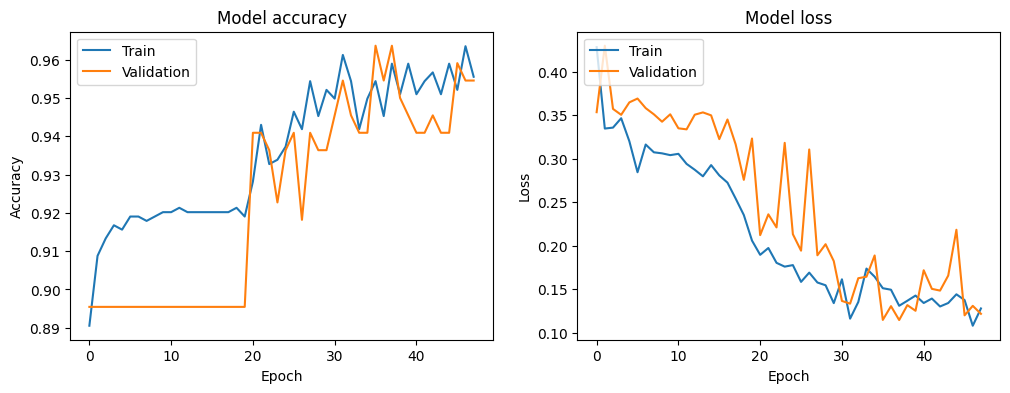

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          VT       0.83      0.83      0.83        23
          LP       0.98      0.98      0.98       197

    accuracy                           0.96       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.96      0.96      0.96       220

Matriz de confusión:
[[ 19   4]
 [  4 193]]


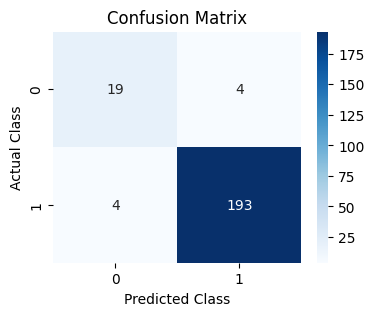

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LayerNormalization, MultiHeadAttention, BatchNormalization, Add, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

spectrograms = []
for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
df_filtered['Spectrogram'] = spectrograms

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])
X_spectrograms = X_spectrograms[..., np.newaxis]

y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.2, random_state=42)

def conv_block(x, filters, kernel_size=(3, 3), activation='relu', pool_size=(2, 2), dropout_rate=0.3):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    x = Dropout(dropout_rate)(x)
    return x

def transformer_block(x, num_heads, key_dim):
    x_norm = LayerNormalization()(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)
    x = Add()([x, attention_output])
    x_norm = LayerNormalization()(x)
    return x_norm

def build_improved_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv_block(inputs, filters=32, kernel_size=(3, 3), dropout_rate=0.2)
    x = conv_block(x, filters=64, kernel_size=(3, 3), dropout_rate=0.3)
    x = conv_block(x, filters=128, kernel_size=(3, 3), dropout_rate=0.4)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    reshaped_x = Reshape((16, 16))(x)
    x = transformer_block(reshaped_x, num_heads=4, key_dim=16)

    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

input_shape = X_spectrograms[0].shape
num_classes = 2
model = build_improved_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_30 (InputLayer)       [(None, 129, 40, 1)]         0         []                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 129, 40, 32)          320       ['input_30[0][0]']            
                                                                                                  
 batch_normalization_50 (Ba  (None, 129, 40, 32)          128       ['conv2d_43[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_14 (Activation)  (None, 129, 40, 32)          0         ['batch_normalization_5

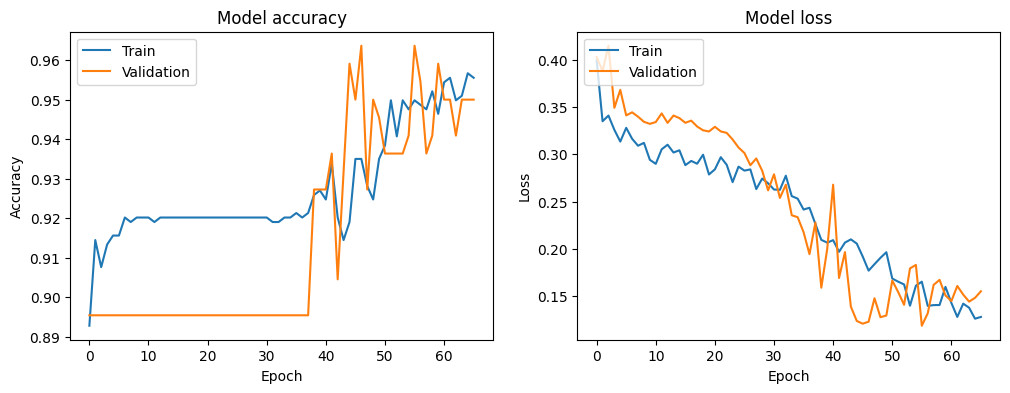

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          VT       0.86      0.78      0.82        23
          LP       0.97      0.98      0.98       197

    accuracy                           0.96       220
   macro avg       0.92      0.88      0.90       220
weighted avg       0.96      0.96      0.96       220

Matriz de confusión:
[[ 18   5]
 [  3 194]]


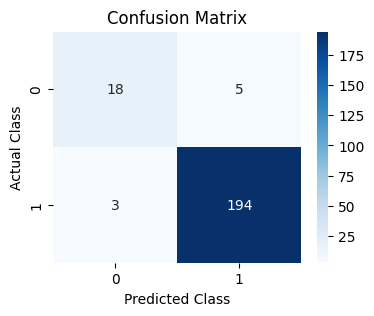

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LayerNormalization, MultiHeadAttention, BatchNormalization, Add, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

spectrograms = []
for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
df_filtered['Spectrogram'] = spectrograms

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])
X_spectrograms = X_spectrograms[..., np.newaxis]

y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.2, random_state=42)

def conv_block(x, filters, kernel_size=(3, 3), activation='relu', pool_size=(2, 2), dropout_rate=0.3):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    x = Dropout(dropout_rate)(x)
    return x

def transformer_block(x, num_heads, key_dim):
    x_norm = LayerNormalization()(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)
    x = Add()([x, attention_output])
    x_norm = LayerNormalization()(x)
    return x_norm

def build_improved_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv_block(inputs, filters=32, kernel_size=(3, 3), dropout_rate=0.2)
    x = conv_block(x, filters=64, kernel_size=(3, 3), dropout_rate=0.2)
    x = conv_block(x, filters=128, kernel_size=(3, 3), dropout_rate=0.3)
    x = conv_block(x, filters=256, kernel_size=(3, 3), dropout_rate=0.3)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    reshaped_x = Reshape((32, 8))(x)
    x = transformer_block(reshaped_x, num_heads=8, key_dim=8)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

input_shape = X_spectrograms[0].shape
num_classes = 2
model = build_improved_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Epoch 1/100
14/14 [==============================] - 4s 32ms/step - loss: 0.9179 - accuracy: 0.6340 - val_loss: 0.5502 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 0.7759 - accuracy: 0.5485 - val_loss: 0.3373 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 3/100
14/14 [==============================] - 0s 12ms/step - loss: 0.9060 - accuracy: 0.5530 - val_loss: 0.4748 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 4/100
14/14 [==============================] - 0s 12ms/step - loss: 0.8976 - accuracy: 0.5553 - val_loss: 0.5911 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 5/100
14/14 [==============================] - 0s 12ms/step - loss: 0.8327 - accuracy: 0.5576 - val_loss: 0.4577 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.8162 - accuracy: 0.5393 - val_loss: 0.4448 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 7/100
14/14 [===========================

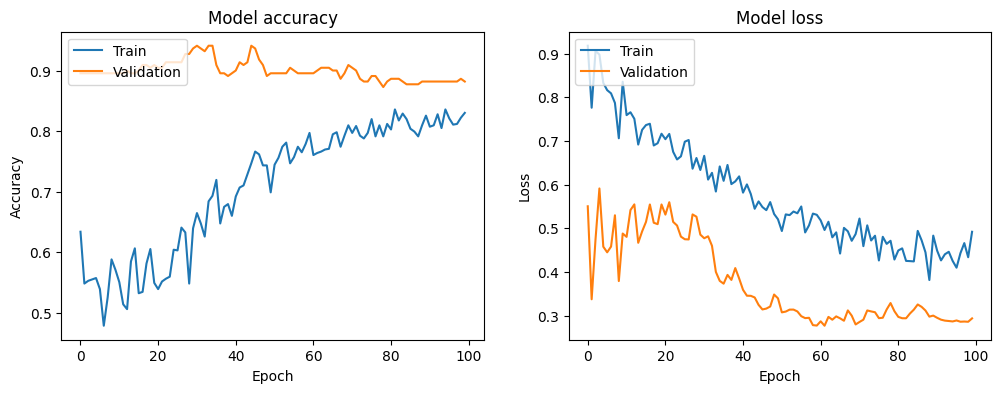

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

          VT       0.47      0.87      0.61        23
          LP       0.98      0.88      0.93       197

    accuracy                           0.88       220
   macro avg       0.72      0.88      0.77       220
weighted avg       0.93      0.88      0.90       220

Matriz de confusión:
[[ 20   3]
 [ 23 174]]


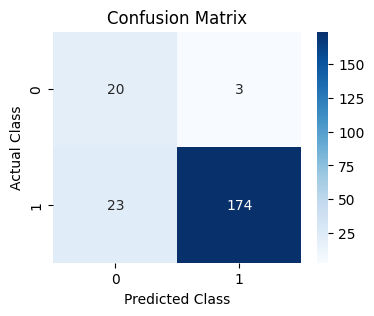

In [ ]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LayerNormalization, MultiHeadAttention, BatchNormalization, Add, GlobalAveragePooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

spectrograms = []
for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
df_filtered['Spectrogram'] = spectrograms

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])
X_spectrograms = X_spectrograms[..., np.newaxis]

y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.2, random_state=42)

def conv_block(x, filters, kernel_size=(3, 3), activation='relu', pool_size=(2, 2), dropout_rate=0.3):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    x = Dropout(dropout_rate)(x)
    return x

def transformer_block(x, num_heads, key_dim):
    x_norm = LayerNormalization()(x)
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x_norm, x_norm)
    x = Add()([x, attention_output])
    x_norm = LayerNormalization()(x)
    return x_norm

# Calcular los pesos de las clases correctamente como un diccionario
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df_filtered['Type'].map({'VT': 0, 'LP': 1})), y=df_filtered['Type'].map({'VT': 0, 'LP': 1}))
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

def build_better_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv_block(inputs, filters=32, kernel_size=(3, 3), dropout_rate=0.2)
    x = conv_block(x, filters=64, kernel_size=(3, 3), dropout_rate=0.3)
    x = conv_block(x, filters=128, kernel_size=(3, 3), dropout_rate=0.4)
    x = conv_block(x, filters=256, kernel_size=(3, 3), dropout_rate=0.4)  # Capa adicional

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    reshaped_x = Reshape((32, 8))(x)  # Ajuste de las dimensiones
    x = transformer_block(reshaped_x, num_heads=8, key_dim=8)  # Aumenté el número de cabezas en el transformer

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)  # Capa densa más grande
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

model = build_better_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para reducir la tasa de aprendizaje cuando no haya mejora
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Ajustar el entrenamiento con el diccionario de pesos de las clases
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),
                    class_weight=class_weights_dict, callbacks=[lr_scheduler])

# Graficar los resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Shape before reshape: (None, 8, 2, 512)
Epoch 1/100
14/14 [==============================] - 8s 50ms/step - loss: 1.1393 - accuracy: 0.6556 - val_loss: 0.3991 - val_accuracy: 0.8955 - lr: 1.0000e-04
Epoch 2/100
14/14 [==============================] - 0s 19ms/step - loss: 1.2536 - accuracy: 0.4812 - val_loss: 0.3440 - val_accuracy: 0.8955 - lr: 1.0000e-04
Epoch 3/100
14/14 [==============================] - 0s 19ms/step - loss: 1.1802 - accuracy: 0.6135 - val_loss: 0.4427 - val_accuracy: 0.8955 - lr: 1.0000e-04
Epoch 4/100
14/14 [==============================] - 0s 19ms/step - loss: 1.1188 - accuracy: 0.5758 - val_loss: 0.5231 - val_accuracy: 0.8227 - lr: 1.0000e-04
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 1.0370 - accuracy: 0.6055 - val_loss: 0.2798 - val_accuracy: 0.8955 - lr: 1.0000e-04
Epoch 6/100
14/14 [==============================] - 0s 20ms/step - loss: 0.8599 - accuracy: 0.6625 - val_loss: 0.3045 - val_accuracy: 0.9091 - lr: 1.0000e-04
Epoch 

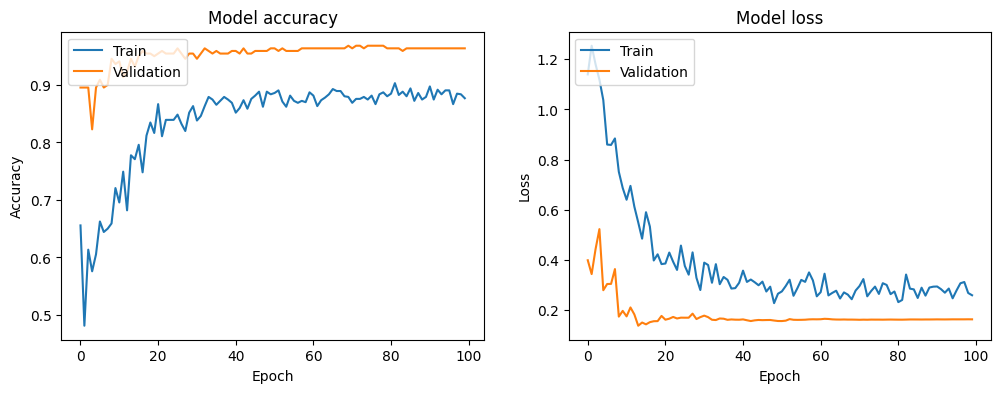

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

          VT       0.83      0.83      0.83        23
          LP       0.98      0.98      0.98       197

    accuracy                           0.96       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.96      0.96      0.96       220

Matriz de confusión:
[[ 19   4]
 [  4 193]]


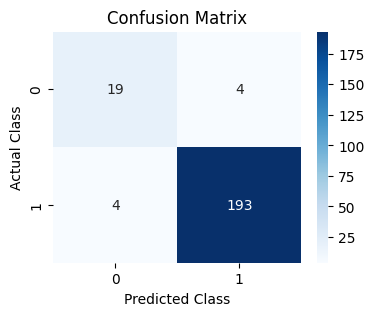

In [ ]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LayerNormalization, MultiHeadAttention, BatchNormalization, Add, GlobalAveragePooling2D, Activation, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

spectrograms = []
for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
df_filtered['Spectrogram'] = spectrograms

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])
X_spectrograms = X_spectrograms[..., np.newaxis]

y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.2, random_state=42)

from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

def advanced_conv_block(x, filters, kernel_size=(3, 3), activation='relu', pool_size=(2, 2), dropout_rate=0.3):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    x = SpatialDropout2D(dropout_rate)(x)  # Spatial dropout
    return x

def build_advanced_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Bloques convolucionales con más filtros
    x = advanced_conv_block(inputs, filters=64, kernel_size=(3, 3), dropout_rate=0.2)
    x = advanced_conv_block(x, filters=128, kernel_size=(3, 3), dropout_rate=0.3)
    x = advanced_conv_block(x, filters=256, kernel_size=(3, 3), dropout_rate=0.4)
    x = advanced_conv_block(x, filters=512, kernel_size=(3, 3), dropout_rate=0.4)  # Más filtros

    # Atención espacial
    attention = Conv2D(1, kernel_size=(1, 1), activation='sigmoid')(x)
    x = Multiply()([x, attention])

    # Verificar la forma antes de la operación de Reshape
    print(f"Shape before reshape: {x.shape}")

    # Ajuste de dimensiones
    reshaped_x = Reshape((x.shape[1] * x.shape[2], x.shape[3]))(x)  # Cambiamos Reshape según la salida real

    # Bloque transformer más profundo
    for _ in range(3):  # Múltiples bloques transformer
        reshaped_x = transformer_block(reshaped_x, num_heads=12, key_dim=16)

    x = Flatten()(reshaped_x)
    x = Dense(512, activation='relu')(x)  # Aumenta el tamaño de la capa densa
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model


# Construir el modelo
model = build_advanced_model(input_shape=X_train.shape[1:], num_classes=2)
model.compile(optimizer=AdamW(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks adicionales
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val),
                    class_weight=class_weights_dict, callbacks=[lr_scheduler])

# Graficar los resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Num GPUs Available:  2
Epoch 1/150
14/14 [==============================] - 8s 333ms/step - loss: 1.2586 - accuracy: 0.3934 - val_loss: 0.7061 - val_accuracy: 0.0545 - lr: 5.0000e-04
Epoch 2/150
14/14 [==============================] - 0s 15ms/step - loss: 0.7182 - accuracy: 0.5211 - val_loss: 0.7081 - val_accuracy: 0.0545 - lr: 5.0000e-04
Epoch 3/150
14/14 [==============================] - 0s 15ms/step - loss: 0.7113 - accuracy: 0.6112 - val_loss: 0.7309 - val_accuracy: 0.0636 - lr: 5.0000e-04
Epoch 4/150
14/14 [==============================] - 0s 14ms/step - loss: 0.6771 - accuracy: 0.6522 - val_loss: 0.8878 - val_accuracy: 0.0545 - lr: 5.0000e-04
Epoch 5/150
14/14 [==============================] - 0s 15ms/step - loss: 0.5370 - accuracy: 0.6363 - val_loss: 0.3829 - val_accuracy: 0.8545 - lr: 5.0000e-04
Epoch 6/150
14/14 [==============================] - 0s 15ms/step - loss: 0.4387 - accuracy: 0.8335 - val_loss: 0.6497 - val_accuracy: 0.6455 - lr: 5.0000e-04
Epoch 7/150
14/14 [===

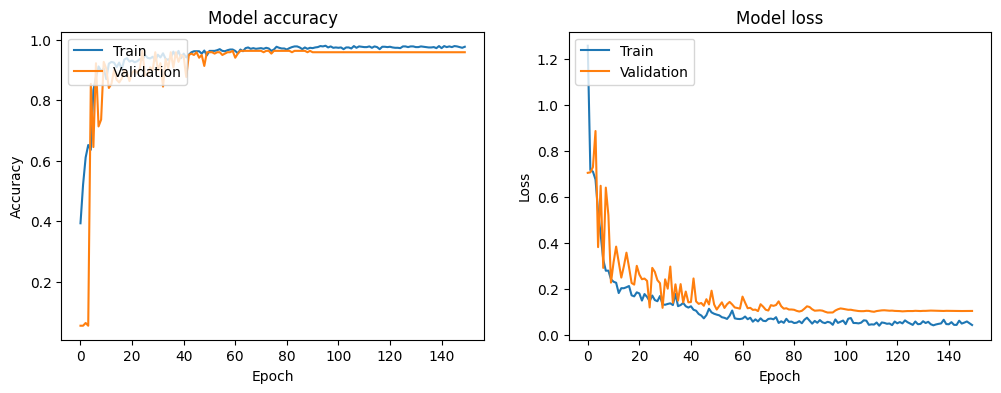

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          VT       0.60      0.75      0.67        12
          LP       0.99      0.97      0.98       208

    accuracy                           0.96       220
   macro avg       0.79      0.86      0.82       220
weighted avg       0.96      0.96      0.96       220

Matriz de confusión:
[[  9   3]
 [  6 202]]


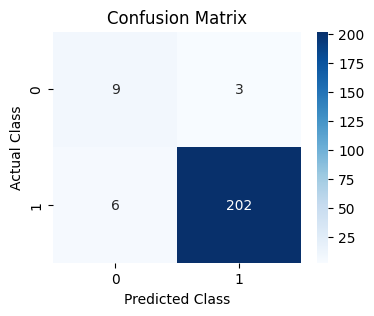

In [ ]:
##CON CUDA---------------------
import numpy as np
import tensorflow as tf
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Comprobar si TensorFlow está utilizando la GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Función para generar espectrogramas a partir de las señales normalizadas
def generate_spectrograms(signals, sr=100, n_fft=2048, hop_length=512):
    spectrograms = []
    for signal in signals:
        # Convertir la señal en un espectrograma
        S = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length)
        S_dB = librosa.power_to_db(S, ref=np.max)
        spectrograms.append(S_dB)
    return np.array(spectrograms)

# Generar espectrogramas a partir de las señales normalizadas (columna 'NormalizedSignal')
spectrograms = generate_spectrograms(df_filtered['NormalizedSignal'])

# Normalizar los espectrogramas (opcional, según tus necesidades)
spectrograms = (spectrograms - np.mean(spectrograms)) / np.std(spectrograms)

# Redimensionar los espectrogramas para que tengan 3 canales si es necesario
spectrograms = np.expand_dims(spectrograms, axis=-1)

# Separar en conjuntos de entrenamiento y validación (suponiendo que ya tienes X_train, X_val)
X_train = spectrograms[:int(len(spectrograms) * 0.8)]
X_val = spectrograms[int(len(spectrograms) * 0.8):]
y_train = df_filtered['Type'][:int(len(df_filtered) * 0.8)].map({'VT': 0, 'LP': 1})
y_val = df_filtered['Type'][int(len(df_filtered) * 0.8):].map({'VT': 0, 'LP': 1})

# Convertir las etiquetas a formato categórico
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

# Calcular los pesos de las clases correctamente como un diccionario
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(df_filtered['Type'].map({'VT': 0, 'LP': 1})),
    y=df_filtered['Type'].map({'VT': 0, 'LP': 1})
)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Definir los bloques de convolución
def conv_block(x, filters, kernel_size, dropout_rate):
    x = Conv2D(filters, kernel_size, padding='same', activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    return x

# Definir el bloque transformer (esto dependerá de tu implementación)
def transformer_block(x, num_heads, key_dim):
    # Aquí puedes agregar tu implementación del bloque transformer o usar una capa ya definida
    return x

# Definir el modelo mejorado
def build_better_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = conv_block(inputs, filters=32, kernel_size=(3, 3), dropout_rate=0.2)
    x = conv_block(x, filters=64, kernel_size=(3, 3), dropout_rate=0.3)
    x = conv_block(x, filters=128, kernel_size=(3, 3), dropout_rate=0.4)
    x = conv_block(x, filters=256, kernel_size=(3, 3), dropout_rate=0.4)  # Capa adicional

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    reshaped_x = Reshape((32, 8))(x)  # Ajuste de las dimensiones
    x = transformer_block(reshaped_x, num_heads=8, key_dim=8)  # Aumenté el número de cabezas en el transformer

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)  # Capa densa más grande
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

# Parámetros
input_shape = (spectrograms.shape[1], spectrograms.shape[2], spectrograms.shape[3])  # Ajustar según el tamaño de los espectrogramas
num_classes = 2  # VT y LP

# Construir el modelo
model = build_better_model(input_shape, num_classes)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback para reducir la tasa de aprendizaje cuando no haya mejora
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Ajustar el entrenamiento con el diccionario de pesos de las clases
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val),
                    class_weight=class_weights_dict, callbacks=[lr_scheduler])

# Graficar los resultados
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Predicciones y reporte de clasificación
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()



Epoch 1/150
14/14 [==============================] - 4s 25ms/step - loss: 0.7234 - accuracy: 0.5952 - val_loss: 0.5360 - val_accuracy: 0.8955 - lr: 5.0000e-04
Epoch 2/150
14/14 [==============================] - 0s 9ms/step - loss: 0.5468 - accuracy: 0.7241 - val_loss: 1.0056 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 3/150
14/14 [==============================] - 0s 9ms/step - loss: 0.6239 - accuracy: 0.7469 - val_loss: 0.8837 - val_accuracy: 0.1045 - lr: 5.0000e-04
Epoch 4/150
14/14 [==============================] - 0s 9ms/step - loss: 0.4678 - accuracy: 0.7583 - val_loss: 0.5711 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 5/150
14/14 [==============================] - 0s 9ms/step - loss: 0.4700 - accuracy: 0.8449 - val_loss: 0.5322 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 6/150
14/14 [==============================] - 0s 9ms/step - loss: 0.4363 - accuracy: 0.7925 - val_loss: 0.5407 - val_accuracy: 0.9091 - lr: 5.0000e-04
Epoch 7/150
14/14 [==============================] 

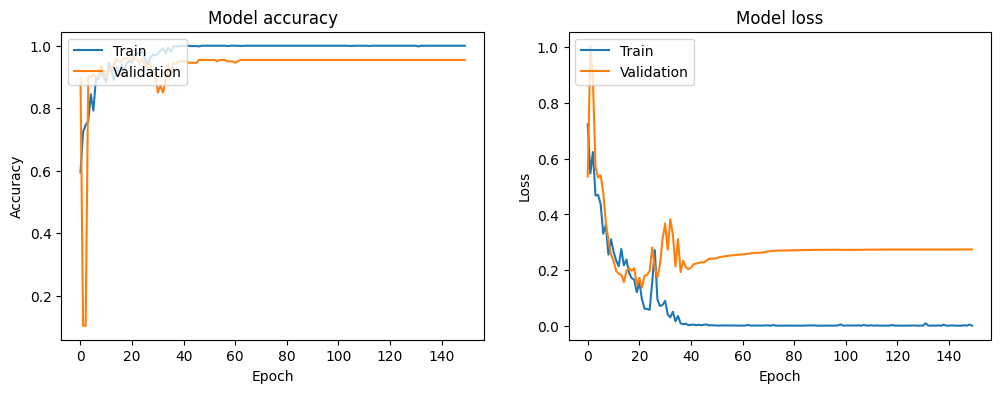

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

          VT       0.78      0.78      0.78        23
          LP       0.97      0.97      0.97       197

    accuracy                           0.95       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.95      0.95      0.95       220

Matriz de confusión:
[[ 18   5]
 [  5 192]]


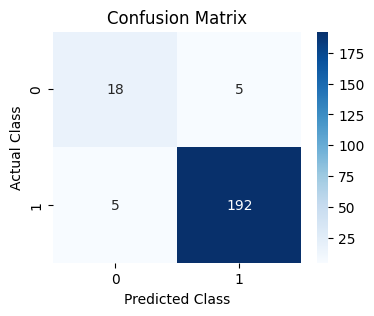

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, MultiHeadAttention, BatchNormalization, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
import seaborn as sns
import tensorflow as tf

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

spectrograms = []
for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
df_filtered['Spectrogram'] = spectrograms

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])
X_spectrograms = X_spectrograms[..., np.newaxis]

y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values
y = to_categorical(y, num_classes=2)

X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.2, random_state=42)

def encoder_block(x, filters, kernel_size, pool_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=pool_size)(x)
    x = BatchNormalization()(x)
    return x

def transformer_block(x, num_heads, key_dim):
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    attention_output = Dropout(0.1)(attention_output)
    return attention_output

def build_model_with_encoder(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Encoder: CNN layers for feature extraction
    x = encoder_block(inputs, filters=32, kernel_size=(3, 3), pool_size=(2, 2))
    x = encoder_block(x, filters=64, kernel_size=(3, 3), pool_size=(2, 2))
    x = encoder_block(x, filters=128, kernel_size=(3, 3), pool_size=(2, 2))
    x = encoder_block(x, filters=256, kernel_size=(3, 3), pool_size=(2, 2))

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Reshape to feed into transformer block
    reshaped_x = Reshape((32, 8))(x)
    x = transformer_block(reshaped_x, num_heads=8, key_dim=8)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df_filtered['Type'].map({'VT': 0, 'LP': 1})), y=df_filtered['Type'].map({'VT': 0, 'LP': 1}))
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

model = build_model_with_encoder(input_shape=(X_spectrograms.shape[1], X_spectrograms.shape[2], 1), num_classes=2)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_val, y_val),
                    class_weight=class_weights_dict, callbacks=[lr_scheduler])

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


#### con modelo preentrenado

9406464/9406464 [==============================] - 1s 0us/step
Model: "model_44"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_60 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_150 (Conv2D)         (None, 224, 224, 16)         448       ['input_60[0][0]']            
                                                                                                  
 max_pooling2d_118 (MaxPool  (None, 112, 112, 16)         0         ['conv2d_150[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_151 (Conv2D)        

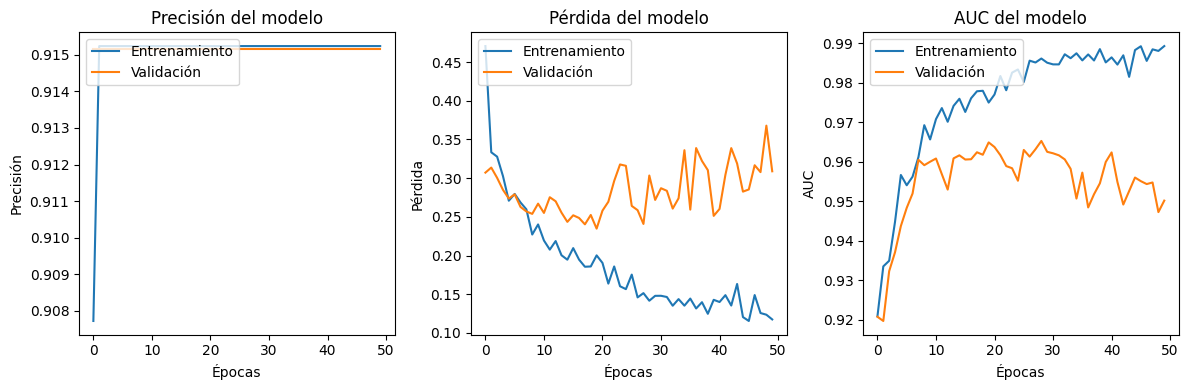

6/6 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

          VT       0.00      0.00      0.00        14
          LP       0.92      1.00      0.96       151

    accuracy                           0.92       165
   macro avg       0.46      0.50      0.48       165
weighted avg       0.84      0.92      0.87       165

Matriz de confusión:
[[  0  14]
 [  0 151]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


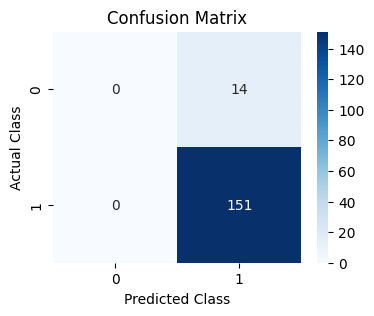

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dense, Flatten,
                                     GlobalAveragePooling2D, Dropout, BatchNormalization, concatenate)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.metrics import AUC

# Paso 1: Generar espectrogramas con dimensiones estándar
def generate_spectrogram(signal, sr=100):
    n_fft = 1024
    hop_length = 512
    spectrogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

spectrograms = []
labels = []

for idx, row in df_filtered.iterrows():
    signal = row['NormalizedSignal']
    label = row['Type']
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)
    labels.append(label)

X_spectrograms = np.array(spectrograms)
# Convertir a 3 canales para adaptarse al modelo preentrenado
X_spectrograms = np.stack((X_spectrograms,)*3, axis=-1)

# Redimensionar los espectrogramas al tamaño estándar esperado por MobileNetV2 (224x224)
import cv2
X_resized = []
for img in X_spectrograms:
    img_resized = cv2.resize(img, (224, 224))
    X_resized.append(img_resized)
X_resized = np.array(X_resized)

# Preprocesar las imágenes según MobileNetV2
X_resized = preprocess_input(X_resized)

y = np.array(labels)
y = np.where(y == 'VT', 0, 1)
y = to_categorical(y, num_classes=2)

# Mezclar los datos
X_resized, y = shuffle(X_resized, y, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_resized, y, test_size=0.15, random_state=42, stratify=y)

# Paso 2: Definir el modelo preentrenado y ajustar la arquitectura
def build_model(input_shape, num_classes):
    # Cargar el modelo preentrenado sin la parte superior
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Congelar las capas del modelo base
    base_model.trainable = False

    # Añadir nuestras propias capas CNN según tu especificación
    inputs = Input(shape=input_shape)

    # Pasar las entradas por el modelo preentrenado
    x_base = base_model(inputs, training=False)
    x_base = Flatten()(x_base)

    # Nuestras capas CNN
    x_cnn = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    x_cnn = MaxPooling2D((2, 2))(x_cnn)
    x_cnn = Conv2D(16, (3, 3), activation='relu', padding='same')(x_cnn)
    x_cnn = MaxPooling2D((2, 2))(x_cnn)
    x_cnn = Flatten()(x_cnn)

    # Combinar las características del modelo preentrenado y nuestras capas CNN
    x = concatenate([x_base, x_cnn])

    # Capa totalmente conectada con 32 neuronas
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (224, 224, 3)
num_classes = 2

model = build_model(input_shape, num_classes)

optimizer = Adam(learning_rate=1e-4)

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy', AUC(name='auc')]
)

model.summary()

# Paso 3: Entrenamiento del modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[]
)

# Paso 4: Evaluación del modelo
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('AUC del modelo')
plt.ylabel('AUC')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.tight_layout()
plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['VT', 'LP']))

cm = confusion_matrix(y_true, y_pred_classes)
print('Matriz de confusión:')
print(cm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


### espectograma alta resolucion

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import time

# Cargar el dataset de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Convertir las etiquetas en one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Crear el modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo (una época para medir la velocidad)
model.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test))

end_time = time.time()

# Mostrar el tiempo total de entrenamiento
print(f"Tiempo de entrenamiento para una época: {end_time - start_time:.2f} segundos")


938/938 [==============================] - 4s 3ms/step - loss: 0.1845 - accuracy: 0.9433 - val_loss: 0.0521 - val_accuracy: 0.9850
Tiempo de entrenamiento para una época: 4.48 segundos


/usr/local/lib/python3.10/dist-packages/librosa/display.py:1255: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  if __same_axes(x_axis, y_axis, axes.get_xlim(), axes.get_ylim()) and auto_aspect:


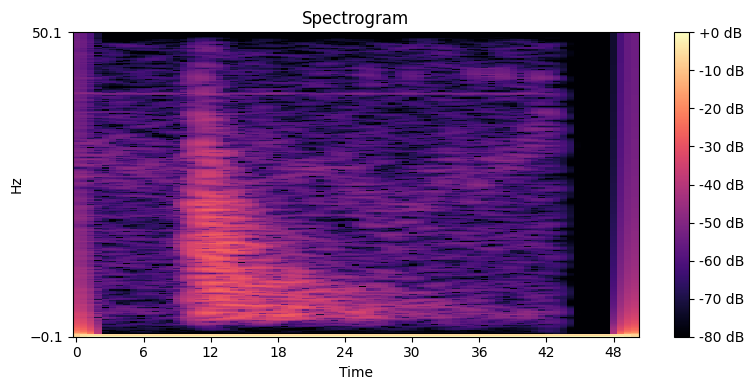

In [ ]:
import librosa
import librosa.display

def generate_high_res_spectrogram(signal, sr=100, n_fft=512, hop_length=64):
    # sr es la tasa de muestreo (sampling rate)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)
def plot_spectrogram(spectrogram, sr=100):
    plt.figure(figsize=(8, 4))  # Aumentar el tamaño del gráfico
    librosa.display.specshow(spectrogram, sr=sr, hop_length=64, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

# Generar nuevos espectrogramas con mayor resolución
high_res_spectrograms = []

for signal in df_filtered['NormalizedSignal']:
    high_res_spectrogram = generate_high_res_spectrogram(signal)
    high_res_spectrograms.append(high_res_spectrogram)

df_filtered['HighResSpectrogram'] = high_res_spectrograms

# Definir la forma de espectrograma objetivo (puede depender de n_fft y hop_length que uses)
target_shape = (128, 128)

# Función para aplicar padding o recortar el espectrograma a un tamaño específico
def pad_or_truncate_spectrogram(spectrogram, target_shape):
    if spectrogram.shape[0] > target_shape[0]:
        spectrogram = spectrogram[:target_shape[0], :]
    if spectrogram.shape[1] > target_shape[1]:
        spectrogram = spectrogram[:, :target_shape[1]]
    # Aplicar padding si es necesario
    pad_height = target_shape[0] - spectrogram.shape[0]
    pad_width = target_shape[1] - spectrogram.shape[1]
    spectrogram = np.pad(spectrogram, ((0, pad_height), (0, pad_width)), mode='constant')
    return spectrogram

# Aplicar padding o truncamiento a todos los espectrogramas
padded_spectrograms = np.array([pad_or_truncate_spectrogram(spec, target_shape) for spec in df_filtered['HighResSpectrogram']])

# Asegurarte de que los espectrogramas tienen la dimensión correcta
padded_spectrograms = padded_spectrograms[..., np.newaxis]  # Añadir canal extra para Conv2D

plot_spectrogram(df_filtered['HighResSpectrogram'].iloc[0])


Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_66 (InputLayer)       [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_168 (Conv2D)         (None, 126, 126, 64)         640       ['input_66[0][0]']            
                                                                                                  
 batch_normalization_144 (B  (None, 126, 126, 64)         256       ['conv2d_168[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 max_pooling2d_135 (MaxPool  (None, 63, 63, 64)           0         ['batch_normalization_1

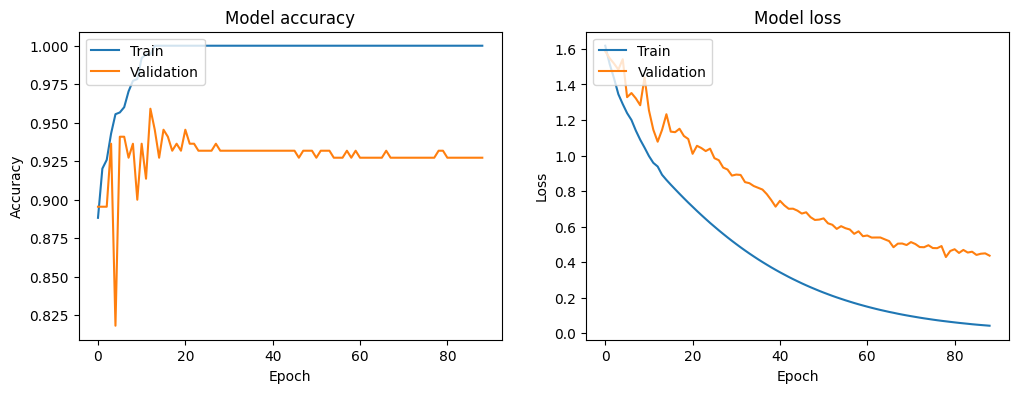

7/7 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.9318
Validation Loss: 0.42942288517951965
Validation Accuracy: 0.9318181872367859
7/7 [==============================] - 0s 4ms/step


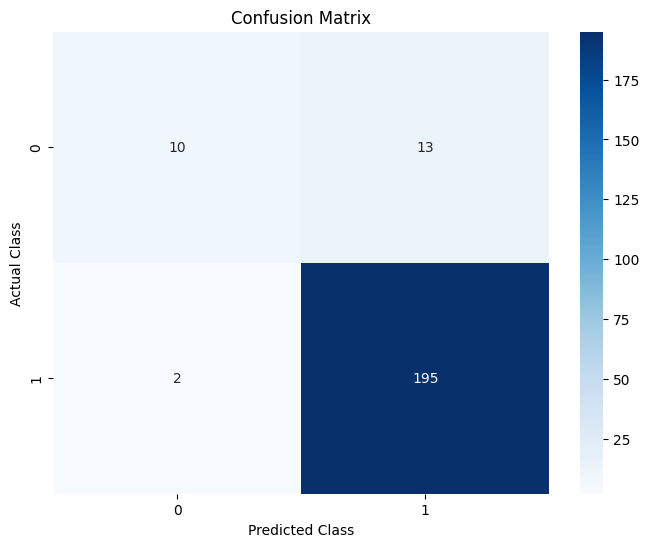

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape, Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Input

def build_high_res_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)

    # Bloques Convolucionales para extraer características
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aplanar para pasar a los bloques Transformer
    x = Flatten()(x)
    x = Dense(head_size)(x)  # Proyectar las dimensiones
    x = Reshape((1, head_size))(x)  # Cambiar la forma para los bloques Transformer

    # Bloques Transformer
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Capa MLP para la clasificación
    x = Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu", kernel_regularizer='l2')(x)  # Regularización L2
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(2, activation="softmax")(x)

    return Model(inputs, outputs)

# Parámetros del modelo ajustado
input_shape = padded_spectrograms[0].shape  # Forma del espectrograma de alta resolución
model = build_high_res_transformer_model(
    input_shape=input_shape,
    head_size=128,  # Tamaño de las cabezas
    num_heads=4,    # Número de cabezas
    ff_dim=128,     # Dimensión de la red Feed Forward
    num_transformer_blocks=2,  # Bloques Transformer
    mlp_units=[128],  # Capas densas
    dropout=0.1,  # Dropout en los bloques Transformer
    mlp_dropout=0.3  # Dropout en las capas densas
)

# Compilar el modelo
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

model.summary()
# Dividir los datos en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(padded_spectrograms, y, test_size=0.2, random_state=42)

# Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,  # Ajustable según rendimiento
    batch_size=32,
    # callbacks=[]  # Usamos callbacks para ajustar la tasa de aprendizaje y detener el entrenamiento si es necesario
    callbacks=[early_stopping]  # Usamos callbacks para ajustar la tasa de aprendizaje y detener el entrenamiento si es necesario
)

# Plotting training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()



### Capaz de atencion

###Test 1

Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_76 (InputLayer)       [(None, 129, 40, 1)]         0         []                            
                                                                                                  
 conv2d_189 (Conv2D)         (None, 127, 38, 32)          320       ['input_76[0][0]']            
                                                                                                  
 max_pooling2d_150 (MaxPool  (None, 63, 19, 32)           0         ['conv2d_189[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 conv2d_190 (Conv2D)         (None, 61, 17, 64)           18496     ['max_pooling2d_150[0][

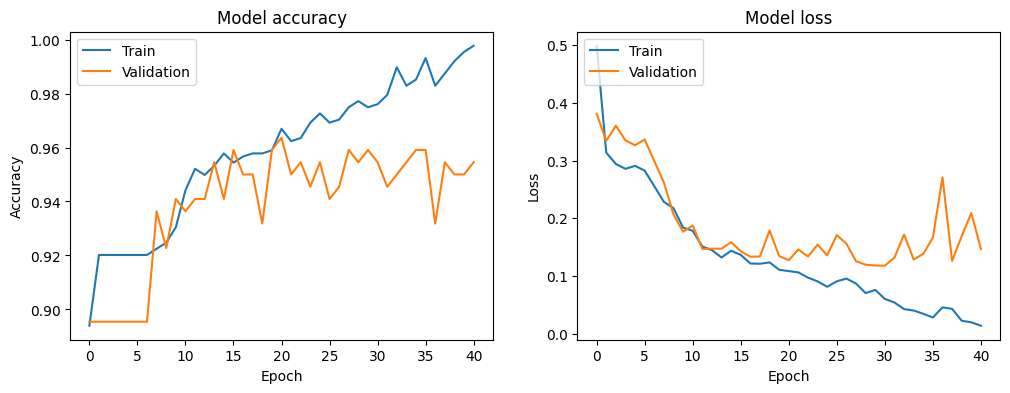

7/7 [==============================] - 0s 6ms/step - loss: 0.1181 - accuracy: 0.9545
Validation Loss: 0.11809709668159485
Validation Accuracy: 0.9545454382896423
7/7 [==============================] - 0s 5ms/step


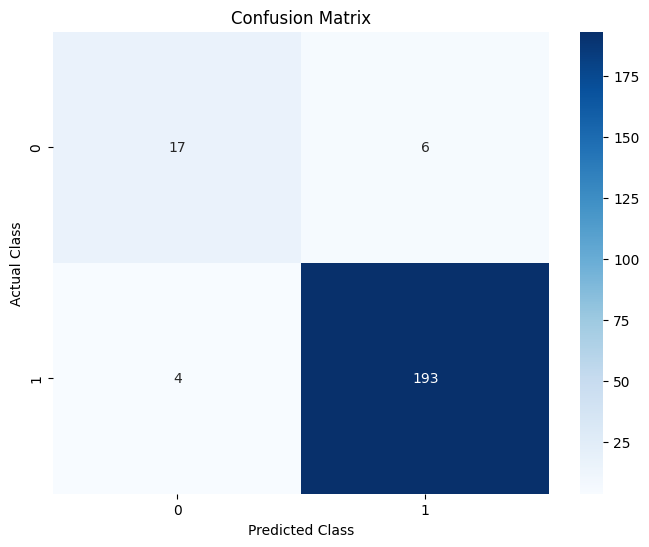

In [ ]:
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MultiHeadAttention, LayerNormalization, Add
from tensorflow.keras.optimizers import Adam

def generate_spectrogram(signal, sr=100):
    stft = librosa.stft(signal, n_fft=256, hop_length=128)
    spectrogram = np.abs(stft)
    return librosa.amplitude_to_db(spectrogram, ref=np.max)

# Generar espectrogramas para todas las señales normalizadas
spectrograms = []
for signal in df_filtered['NormalizedSignal']:
    spectrogram = generate_spectrogram(signal)
    spectrograms.append(spectrogram)

# Guardar los espectrogramas en el dataframe
df_filtered['Spectrogram'] = spectrograms

X_spectrograms = np.array([spec for spec in df_filtered['Spectrogram']])

# Añadir un canal extra (necesario para Conv2D o transformers con imágenes)
X_spectrograms = X_spectrograms[..., np.newaxis]  # Añadir canal para imágenes en escala de grises


y = df_filtered['Type'].map({'VT': 0, 'LP': 1}).values  # Convertir las etiquetas a valores numéricos
y = to_categorical(y, num_classes=2)  # One-hot encoding

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_spectrograms, y, test_size=0.2, random_state=42)


# Definir un bloque transformer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Attention
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)

    # Asegurarse de que la dimensión de 'attn_output' sea la misma que 'inputs'
    # Usamos una capa densa para proyectar la dimensión
    proj_input = Dense(inputs.shape[-1])(attn_output)  # Proyectar a la dimensión original de inputs

    # Residual Connection y Layer Normalization
    out1 = Add()([inputs, proj_input])  # Residual Connection con las mismas dimensiones
    out1 = LayerNormalization(epsilon=1e-6)(out1)

    # Feed Forward Network
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)

    # Proyectar de vuelta a la dimensión original
    proj_ffn_output = Dense(inputs.shape[-1])(ffn_output)  # Proyectar de vuelta a la dimensión original

    # Residual Connection y Layer Normalization
    out2 = Add()([out1, proj_ffn_output])  # Residual Connection
    return LayerNormalization(epsilon=1e-6)(out2)

# Construir el modelo completo con transformers
def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)

    # Capa convolucional inicial
    from tensorflow.keras.regularizers import l2

    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(1e-4))(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Aquí NO aplanamos, en lugar de eso dejamos la dimensionalidad para los Transformers
    # Añadir bloques transformer
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Aplanamos antes de pasar a las capas densas
    x = Flatten()(x)

    # Capa final densa para la clasificación
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)

    # La salida debe tener 2 unidades, una para cada clase
    outputs = Dense(2, activation="softmax")(x)

    return Model(inputs, outputs)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
input_shape = X_spectrograms[0].shape  # Dimensiones del espectrograma
model = build_transformer_model(
    input_shape=input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=128,
    num_transformer_blocks=2,
    mlp_units=[128],
    dropout=0.1,
    mlp_dropout=0.2
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

model.summary()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicciones del modelo
y_true_classes = np.argmax(y_val, axis=1)   # Etiquetas verdaderas

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()



In [ ]:
pip install torch torchaudio